In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import wrf

In [2]:
# get_wrf_slp: given the netCDF4 Dataset() handle for a WRF file, produces the sea-level pressure
#
# INPUTS:
#
# wrfHdl: WRF file netCDF4.Dataset() handle
#
# OUTPUTS:
#
# slp: sea-level pressure in (ny,nx) dimension (hPa)
#
# DEPENDENCIES:
#
# numpy
# netCDF4.Dataset()
# wrf(-python)
def get_wrf_slp(wrfHdl):
    import numpy as np
    from netCDF4 import Dataset
    import wrf
    # Define base-state pot. temperature as 300 K
    # NOTE: This is different from the 'T00' variable in the WRF file, which is specific
    #       to an internal parameter used for a hypothetical WRF profile. See dev notes
    #       under 'derived variables for wrf-python'/'Computing temperature correctly'
    #       for details
    baseTp = 300.  # (K)
    # Define other constants
    R = 287.053  # dry gas constant (J/K*kg)
    cp = 1005.  # heat capacity of air at constant pressure (J/K*kg)
    kappa = R/cp  # (dimensionless)
    # Draw necessary fields to produce slp:
    #  Z: geopotential height (m)
    #  dynaTp: 'dynamic', or perturbation pot. temperature added to baseTp to derive full Tp (K)
    #  P: total pressure (baseP + dynaP) (Pa)
    #  baseP: base-state pressure - this is directly from 'P00' stored in WRF file (Pa)
    #  qVap: water vapor mixing ratio (kg/kg)
    Z = np.asarray(wrf.getvar(wrfHdl,'z')).squeeze()
    dynaTp = np.asarray(wrfHdl.variables['T']).squeeze()
    P = np.asarray(wrf.getvar(wrfHdl,'p')).squeeze()
    baseP = np.asarray(wrfHdl.variables['P00']).squeeze()
    qVap = np.asarray(wrfHdl.variables['QVAPOR']).squeeze()
    # Compute Tp (K)
    Tp = dynaTp + baseTp
    # Compute temperature T (K)
    T = Tp * np.power(P / baseP, kappa)
    # Derive slp from input (Z,T,P,qVap)
    slp = wrf.slp(Z, T, P, qVap)  # hPa
    # Return slp
    return slp


# get_wrf_rh: given the netCDF4 Dataset() handle for a WRF file, produces the relative humidity
#
# INPUTS:
#
# wrfHdl: WRF file netCDF4.Dataset() handle
#
# OUTPUTS:
#
# rh: relative humidity in (nz,ny,nx) dimension (%)
#
# DEPENDENCIES:
#
# numpy
# netCDF4.Dataset()
# wrf(-python)
def get_wrf_rh(wrfHdl):
    import numpy as np
    from netCDF4 import Dataset
    import wrf
    # Define base-state pot. temperature as 300 K
    # NOTE: This is different from the 'T00' variable in the WRF file, which is specific
    #       to an internal parameter used for a hypothetical WRF profile. See dev notes
    #       under 'derived variables for wrf-python'/'Computing temperature correctly'
    #       for details
    baseTp = 300.  # (K)
    # Define other constants
    R = 287.053  # dry gas constant (J/K*kg)
    cp = 1005.  # heat capacity of air at constant pressure (J/K*kg)
    kappa = R/cp  # (dimensionless)
    # Draw necessary fields to produce slp:
    #  dynaTp: 'dynamic', or perturbation pot. temperature added to baseTp to derive full Tp (K)
    #  P: total pressure (baseP + dynaP) (Pa)
    #  baseP: base-state pressure - this is directly from 'P00' stored in WRF file (Pa)
    #  qVap: water vapor mixing ratio (kg/kg)
    dynaTp = np.asarray(wrfHdl.variables['T']).squeeze()
    P = np.asarray(wrf.getvar(wrfHdl,'p')).squeeze()
    baseP = np.asarray(wrfHdl.variables['P00']).squeeze()
    qVap = np.asarray(wrfHdl.variables['QVAPOR']).squeeze()
    # Compute Tp (K)
    Tp = dynaTp + baseTp
    # Compute temperature T (K)
    T = Tp * np.power(P / baseP, kappa)
    # Derive rh from input (qVap,P,T)
    rh = wrf.rh(qVap, P, T)  # (%)
    # Return rh
    return rh

In [3]:
# Ida 2021 case
#wrf_t0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/Ida2021/wrfinput_d01_uptd')
#wrf_p0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/Ida2021/upper_trop_negative/wrfinput_d01_ptdi10')
#wrf_tf=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/Ida2021/wrfout_d01_2021-08-29_18_uptd')
#wrf_pt=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/Ida2021/upper_trop_negative/wrfout_d01_2021-08-29_18_ptdi10')

#adj_t0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/Ida2021/final_sens_d01_2021-08-29_18:00:00')

# March2020 case
#wrf_t0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/march2020_q/wrfinput_d01_uptd')
#wrf_p0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/march2020_q/positive/wrfinput_d01_ptdi22')
wrf_tf=Dataset('wrfout.nc')
#wrf_pt=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/march2020_q/positive/wrfout_d01_2020-03-07_12:00:00_ptdi22')

# Nov2019 case
#wrf_t0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/nov2019_q/wrfinput_d01_uptd')
#wrf_p0=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/nov2019_q/positive/wrfinput_d01_ptdi22')
#wrf_tf=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/nov2019_q/wrfout_d01_2019-11-27_00:00:00_uptd')
#wrf_pt=Dataset('/Users/bhoover/Desktop/SSEC/RESEARCH/PRODUCTION/SSEC_SAVE/WRF_QOIP/nov2019_q/positive/wrfout_d01_2019-11-27_00:00:00_ptdi22')

#pmsl_t0 = np.asarray(wrf.getvar(wrf_t0,'slp')).squeeze()
#pmsl_p0 = np.asarray(wrf.getvar(wrf_p0,'slp')).squeeze()
#pmsl_tf = np.asarray(wrf.getvar(wrf_tf,'slp',timeidx=-1)).squeeze()
#pmsl_pt = np.asarray(wrf.getvar(wrf_pt,'slp',timeidx=-1)).squeeze()
pmsl_tf = np.asarray(get_wrf_slp(wrf_tf)).squeeze()

#mu_t0 = np.asarray(wrf_t0.variables['MU']).squeeze()
#mu_p0 = np.asarray(wrf_p0.variables['MU']).squeeze()

lat = np.asarray(wrf.getvar(wrf_tf,'lat')).squeeze()
lon = np.asarray(wrf.getvar(wrf_tf,'lon')).squeeze()

lon_fix=np.where(lon<0.)
if (np.size(lon_fix)>0):
    lon[lon_fix] = lon[lon_fix] + 360.

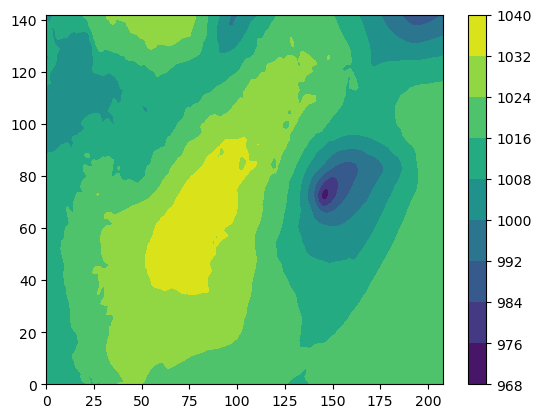

In [4]:
plt.contourf(pmsl_tf)
plt.colorbar()
plt.show()

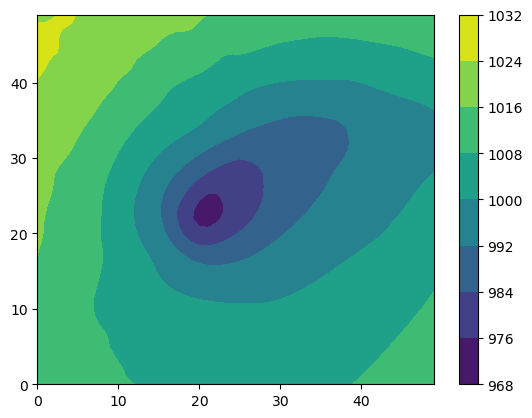

In [5]:
# estimated central point
j1=50
j2=100
i1=125
i2=175
plt.contourf(pmsl_tf[j1:j2,i1:i2])
plt.colorbar()
plt.show()

j,i center: [ 73 146]


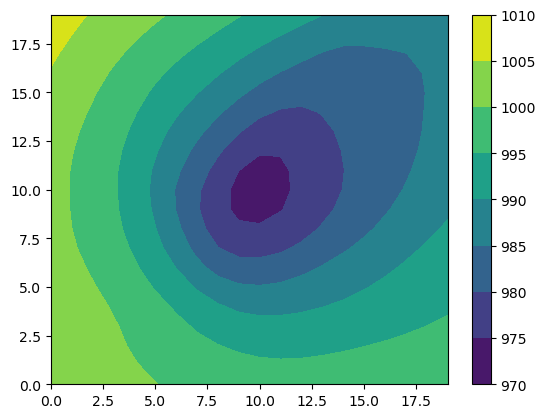

j: (63, 83) i: (136, 156)
minimum slp = 972.99 hPa


In [6]:
# find appropriate center
pmsl_tf_sub=pmsl_tf[j1:j2,i1:i2]

ji_min=np.unravel_index(np.argmin(pmsl_tf_sub),np.shape(pmsl_tf_sub))
ji_min=np.asarray(ji_min)
ji_min[0]=ji_min[0]+j1
ji_min[1]=ji_min[1]+i1
print('j,i center:',ji_min)

ji_ext=10
plt.contourf(pmsl_tf[ji_min[0]-ji_ext:ji_min[0]+ji_ext,ji_min[1]-ji_ext:ji_min[1]+ji_ext])
plt.colorbar()
plt.show()
print("j:",(ji_min[0]-ji_ext,ji_min[0]+ji_ext),"i:",(ji_min[1]-ji_ext,ji_min[1]+ji_ext))
print('minimum slp = {:.2f} hPa'.format(pmsl_tf[ji_min[0],ji_min[1]]))

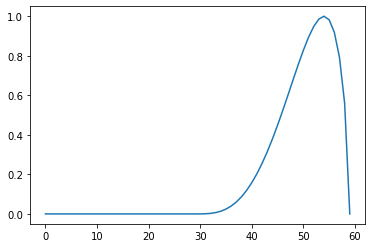

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 7.065647496705181e-05
31 0.0006957052937182483
32 0.0026234129621545686
33 0.006674245406714318
34 0.013679807573413614
35 0.02444546468985831
36 0.039722080962493585
37 0.06018224422035285
38 0.08639883028944442
39 0.11882467414048731
40 0.15777250440325535
41 0.20339446259344307
42 0.25566057233001194
43 0.31433548360410696
44 0.378952698872388
45 0.44878527696840403
46 0.5228116714017494
47 0.5996748234054478
48 0.6776317735543455
49 0.7544896509215521
50 0.8275215079835015
51 0.8933512078700219
52 0.9477885292244587
53 0.9855793771908568
54 1.0
55 0.9821348512093179
56 0.9194187408297309
57 0.7920757850433963
58 0.5608929240514546
59 0.0


In [14]:
##########################################################################
#
# PYTHON 3 FUNCTION
#
# PERT_alpha,PERT_beta = elicitPERT(minX,modeX,maxX)
#
# This function solves for the shape parameters (alpha, beta) describing 
# the beta distribution of X from eliciting three values of the 
# distribution: the minimum value of X (minX), the most common value of X 
# (modeX) and the maximum value of X (maxX). The values of alpha and beta
# are further constrained by the PERT distribution's requirement that the
# mean of the distribution is defined by:
#
# meanX = (minX+4*modeX+maxX)/6
#
# The PERT distribution can then be described using 
# scipy.stats.beta(a=PERT_alpha,b=PERT_beta,loc=minX,scale=maxX-minX).
#
# INPUTS:
#    minX ...................................... smallest possible value of X
#    modeX ..................................... most common value of X
#    maxX ...................................... largest possible value of X
#
# OUTPUTS:
#    PERT_alpha ................................ alpha shape-parameter for (PERT-)beta distribution of X
#    PERT_beta ................................. beta shape-parameter for (PERT-)beta distribution of X
#
##########################################################################
#
# DESCRIPTION OF ELICITATION STRATEGY
#
# The elicitation strategy of a PERT distribution is straightforward,
# since the distribution is directly controlled by the elicitable terms
# of (minX,modeX,maxX). The values of PERT_alpha and PERT_beta are then
# computed by utilizing the following equations:
#
# (1) meanX = (minX+4*modeX+maxX)/6
# (2) PERT_alpha = (4*modeX+maxX-5*minX)/(maxX-minX)
# (3) PERT_beta = (5*maxX-minX-4*modeX)/(maxX-minX)
#
# For both PERT_alpha and PERT_beta, we will define using minX, maxX, and
# meanX, via use of Equation-1. For PERT_alpha, via Equation-1 let:
#
# (4) 4*modeX = 6*meanX-minX-maxX
#
# Applying to Equation-2:
#
# (5) PERT_alpha = ((6*meanX-minX-maxX)+maxX-5*minX)/(maxX-minX)
#
# Which simplifies to:
#
# (5b) PERT_alpha = 6*(meanX-minX)/(maxX-minX)
#
# Applying to Equation-3:
#
# (6) PERT_beta = (5*maxX-minX-(6*meanX-minX-maxX))/(maxX-minX)
#
# Which simplifies to
#
# (6b) PERT_beta = 6*(maxX-meanX)/(maxX-minX)
#
# Yielding the required parameters for the system.
#
def elicitPERT(minX,modeX,maxX):
    ######################################################################
    #
    # Load required modules
    #
    import numpy as np #.................................................. array module
    #
    ######################################################################
    #
    # Initialize output as None
    #
    PERT_alpha = None #................................................... alpha shape-parameter for (PERT-)beta distribution (initialized to None)
    PERT_beta = None #.................................................... alpha shape-parameter for (PERT-)beta distribution (initialized to None)
    #
    ######################################################################
    #
    # Compute meanX via Equation-1:
    #
    meanX = (minX + 4*modeX + maxX)/6.
    #
    #
    # Compute PERT_alpha and PERT_beta in try/except blocks to handle
    # errors
    #
    # PERT_alpha:
    try:
        PERT_alpha = 6*((meanX - minX)/(maxX - minX))
    except:
        print('Error computing PERT_alpha')
        PERT_alpha = None
    # PERT_beta:
    try:
        PERT_beta = 6*((maxX - meanX)/(maxX - minX))
    except:
        print('Error computing PERT_beta')
        PERT_beta = None
    #
    # Return
    #
    return PERT_alpha, PERT_beta

zmin=29.
zmode=54.
zmax=59.

PERT_alpha,PERT_beta=elicitPERT(zmin,zmode,zmax)

from scipy.stats import beta

pert=beta(PERT_alpha,PERT_beta,loc=zmin,scale=zmax-zmin)
z=np.arange(60)
p=pert.pdf(z)
p=p/np.max(p)
plt.plot(z,p)
plt.show()

for i in range(np.size(p)):
    print(z[i],p[i])

In [39]:
mu_tf = np.asarray(wrf_tf.variables['MU']).squeeze()
mu_pt = np.asarray(wrf_pt.variables['MU']).squeeze()
mu_ad = np.asarray(adj_t0.variables['G_MU']).squeeze()

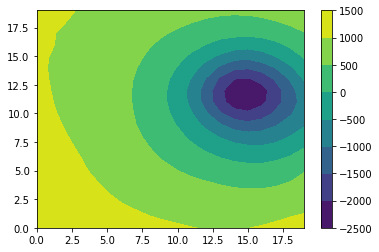

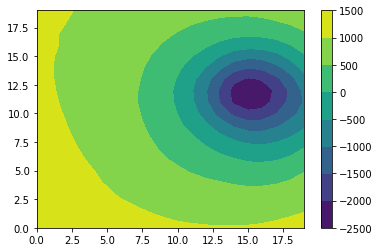

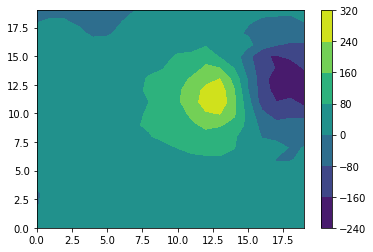

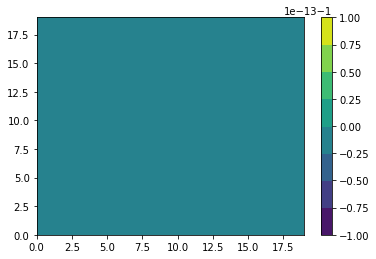

10800.6669483


In [40]:
jmin=71
jmax=91
imin=42
imax=62

plt.contourf(mu_tf[jmin:jmax,imin:imax])
plt.colorbar()
plt.show()

plt.contourf(mu_pt[jmin:jmax,imin:imax])
plt.colorbar()
plt.show()

plt.contourf(mu_pt[jmin:jmax,imin:imax]-mu_tf[jmin:jmax,imin:imax])
plt.colorbar()
plt.show()

plt.contourf(mu_ad[jmin:jmax,imin:imax])
plt.colorbar()
plt.show()

print(np.sum(mu_pt[jmin:jmax,imin:imax]-mu_tf[jmin:jmax,imin:imax]))

In [8]:
import cartopy as cart #................................................................... Plotting: Map module
import cartopy.crs as ccrs #............................................................... Plotting: Map module
import cartopy.feature as cfeature #....................................................... Plotting: Map feature module
import matplotlib #........................................................................ Plotting: Plotting module
from matplotlib import cm #................................................................ Plotting: Colormap module
from matplotlib import colors #............................................................ Plotting: Colors module
import copy #.............................................................................. Copy module

#
# Define font for plots: family, weight, and size
#
font = { #................................................................................. Font definition library
        'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22
       }
matplotlib.rc('font', **font)
#
# Define contour levels: 38.1 mm ~ 1 in
#
clevs = np.arange(950.,1040.1,4.) #........................................................ Contour levels
#
# Create copy of colormap
#
cmap = copy.copy(cm.get_cmap('rainbow')) #................................................. Copy of colormap
#
# Define map features
#
ocean_feature=cfeature.NaturalEarthFeature( #.............................................. Map feature: Ocean
                                           'physical' ,
                                           'ocean'    , 
                                           '50m'
                                          )
border_feature=cfeature.NaturalEarthFeature( #............................................. Map feature: State and province boundaries
                                            'cultural'                 ,
                                            'admin_1_states_provinces' ,
                                            '50m'
                                           )
#
# Define map projection
#
proj=ccrs.Mercator(central_longitude=196.5) #.............................................. Map projection
#
# Define other communal aspects of map figures
#
vmin_pmsl = 950. #........................................................................... Minimum plotting value for precip
vmax_pmsl = 1040. #.......................................................................... Maximum plotting value for precip
ext_opt = 'both' #......................................................................... Colorbar extend= option
#




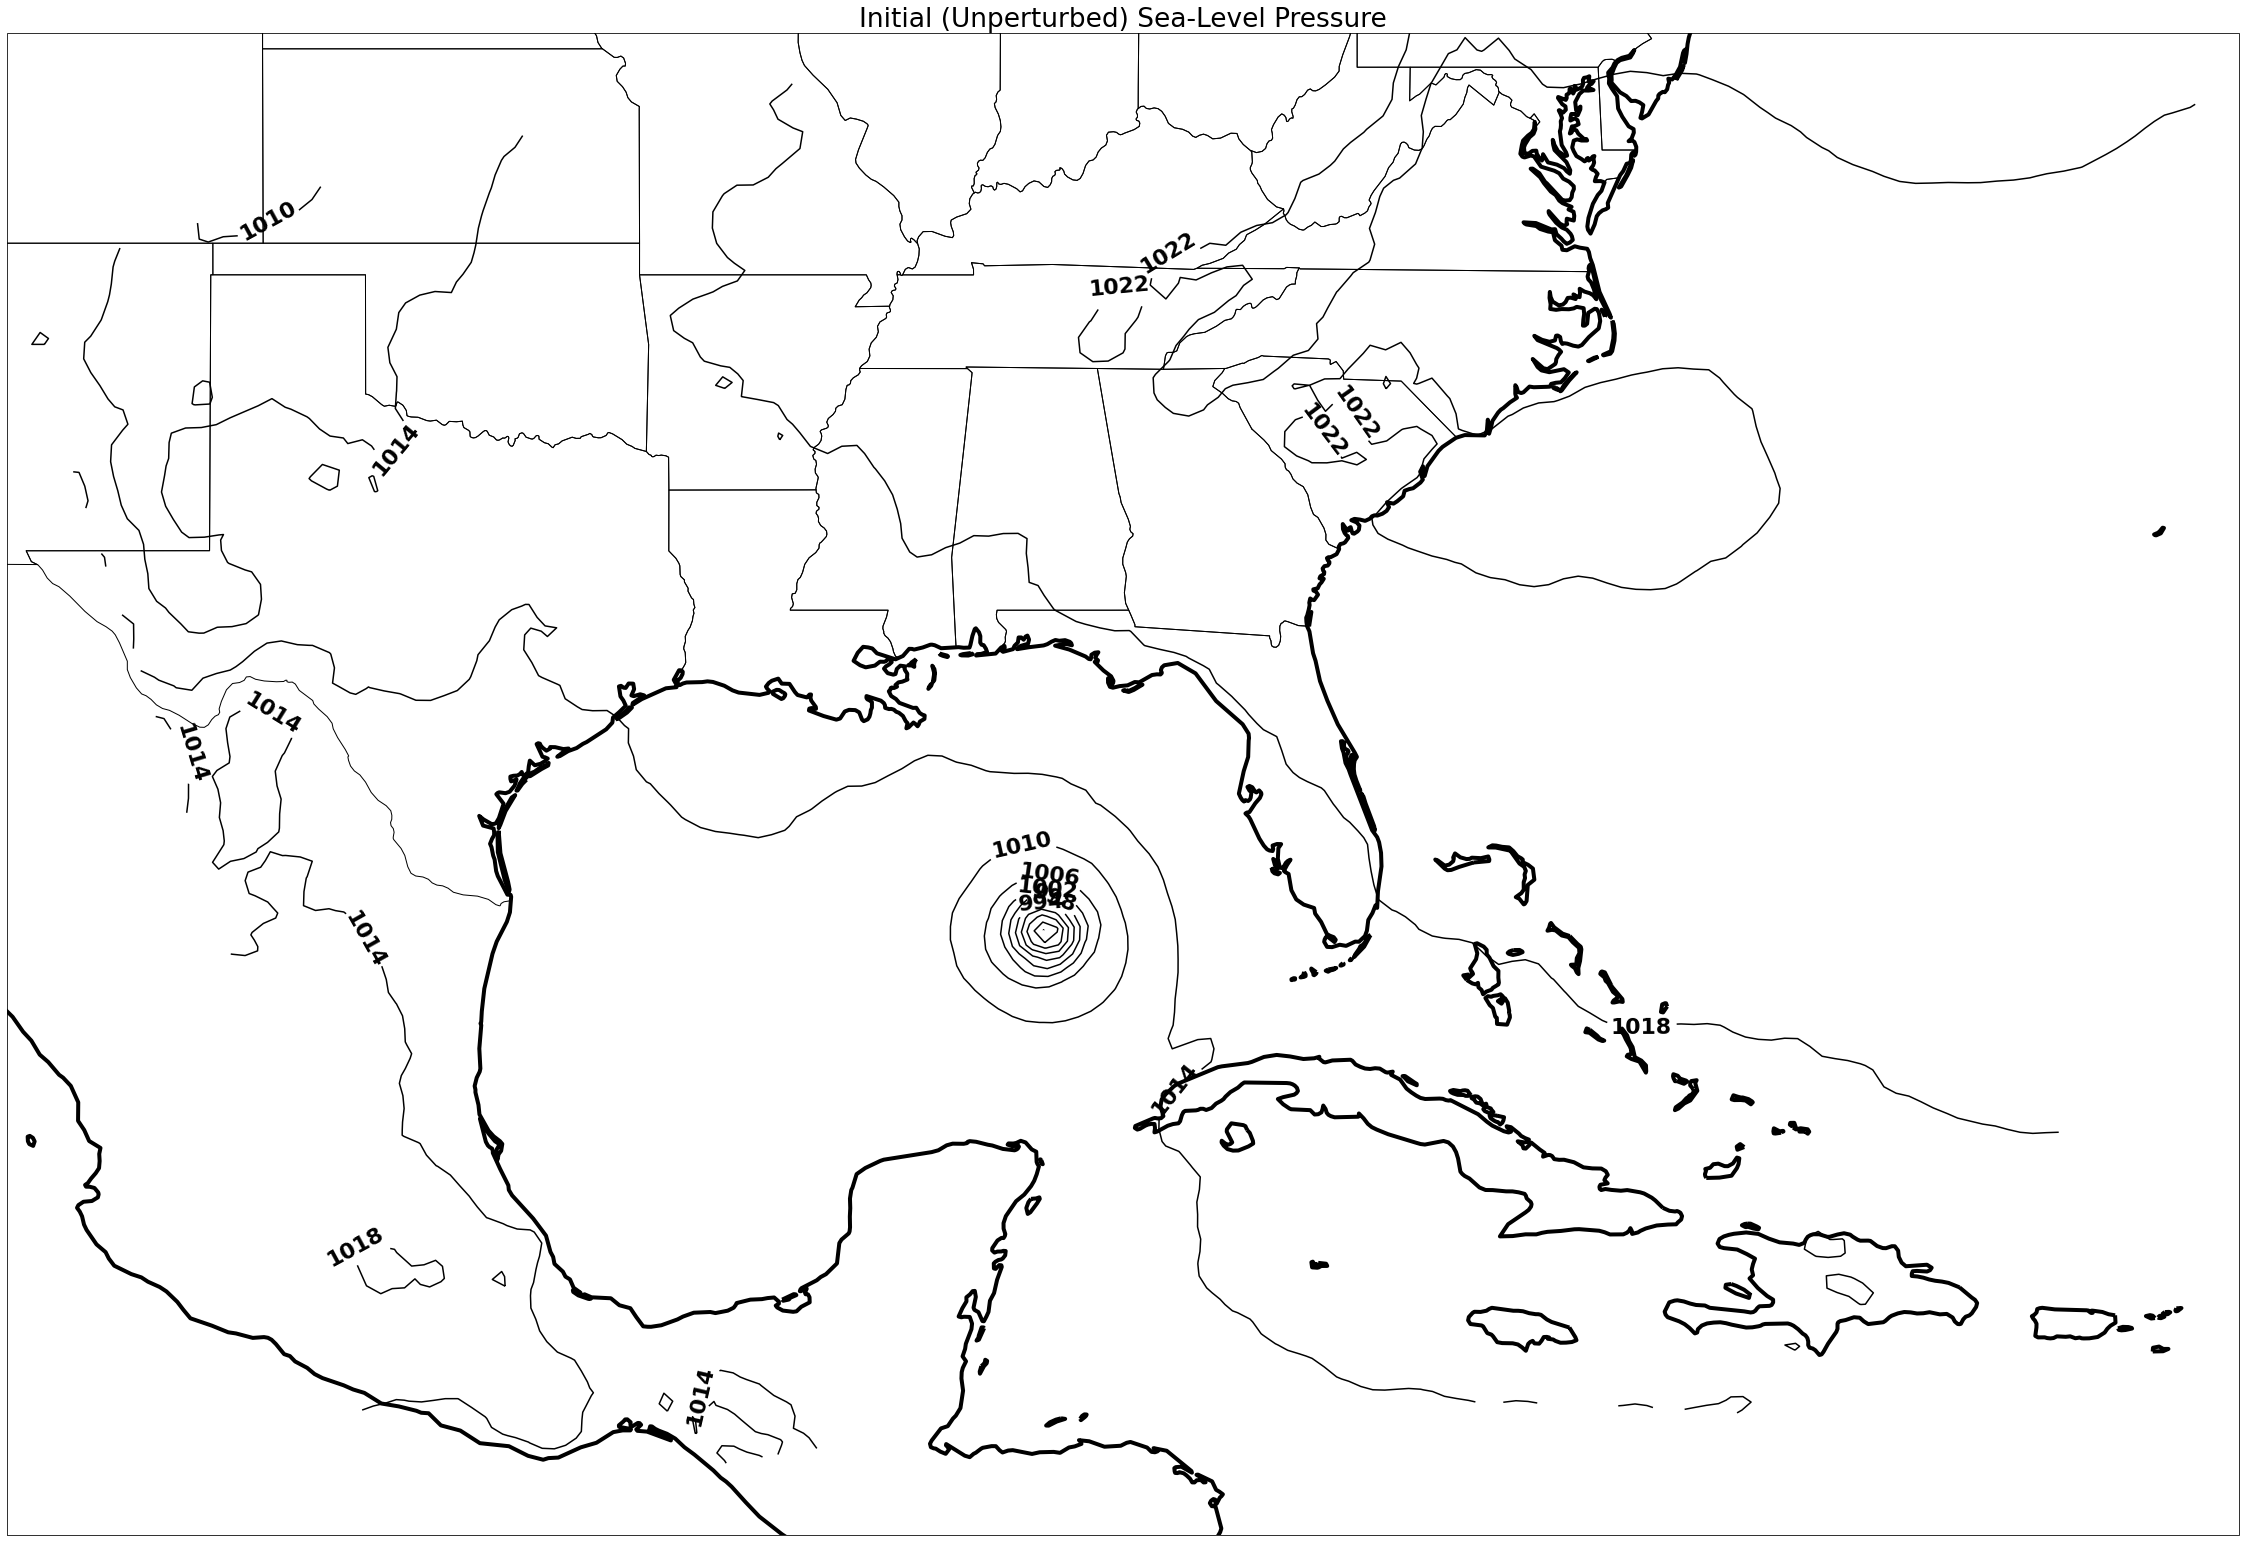

In [9]:
clevs = np.arange(950.,1040.1,4.)
vmin_pmsl = 950.
vmax_pmsl = 1040.

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add filled contours: pmsl
cs=ax.contour(
               lon,
               lat,
               pmsl_t0,
               clevs,
               zorder=1,
               transform=ccrs.PlateCarree(),
               colors='k',
               vmin=vmin_pmsl,
               vmax=vmax_pmsl,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.clabel(cs,fmt='%d')
plt.title('Initial (Unperturbed) Sea-Level Pressure')
plt.show()

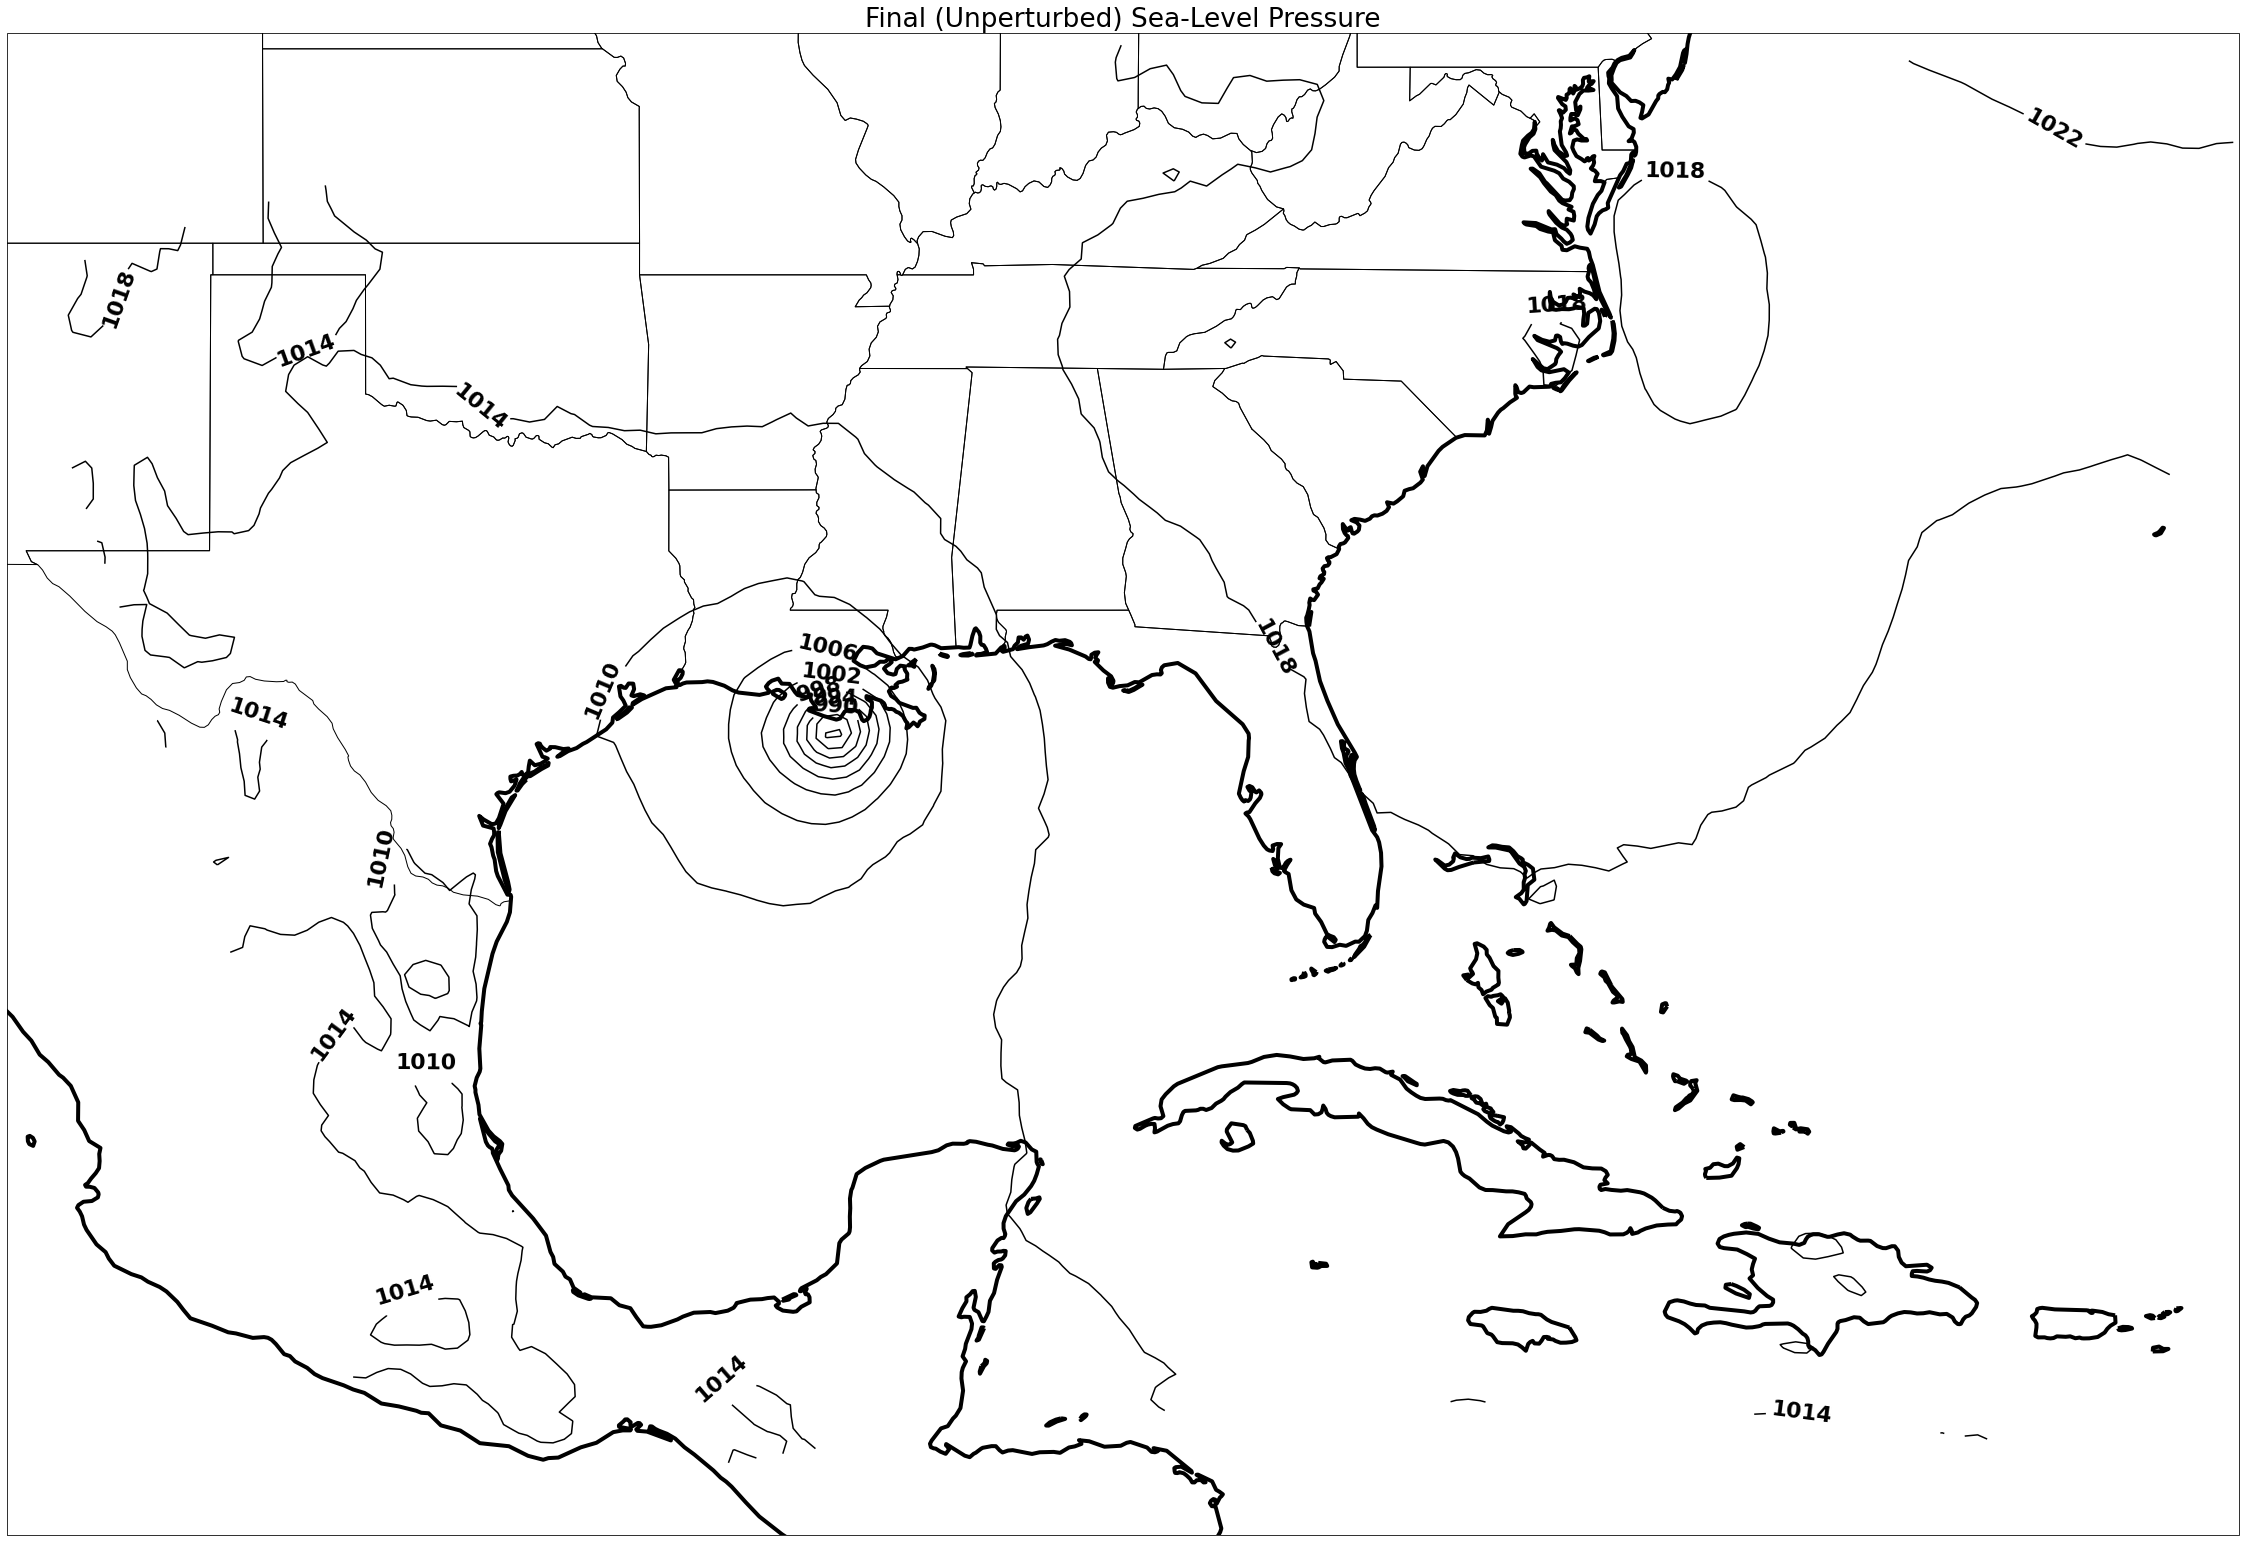

In [10]:
clevs = np.arange(950.,1040.1,4.)
vmin_pmsl = 950.
vmax_pmsl = 1040.

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add filled contours: pmsl
cs=ax.contour(
               lon,
               lat,
               pmsl_tf,
               clevs,
               zorder=1,
               transform=ccrs.PlateCarree(),
               colors='k',
               vmin=vmin_pmsl,
               vmax=vmax_pmsl,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.clabel(cs,fmt='%d')
plt.title('Final (Unperturbed) Sea-Level Pressure')
plt.show()
#plt.savefig('nov2019_pmsl-F36_uptd.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

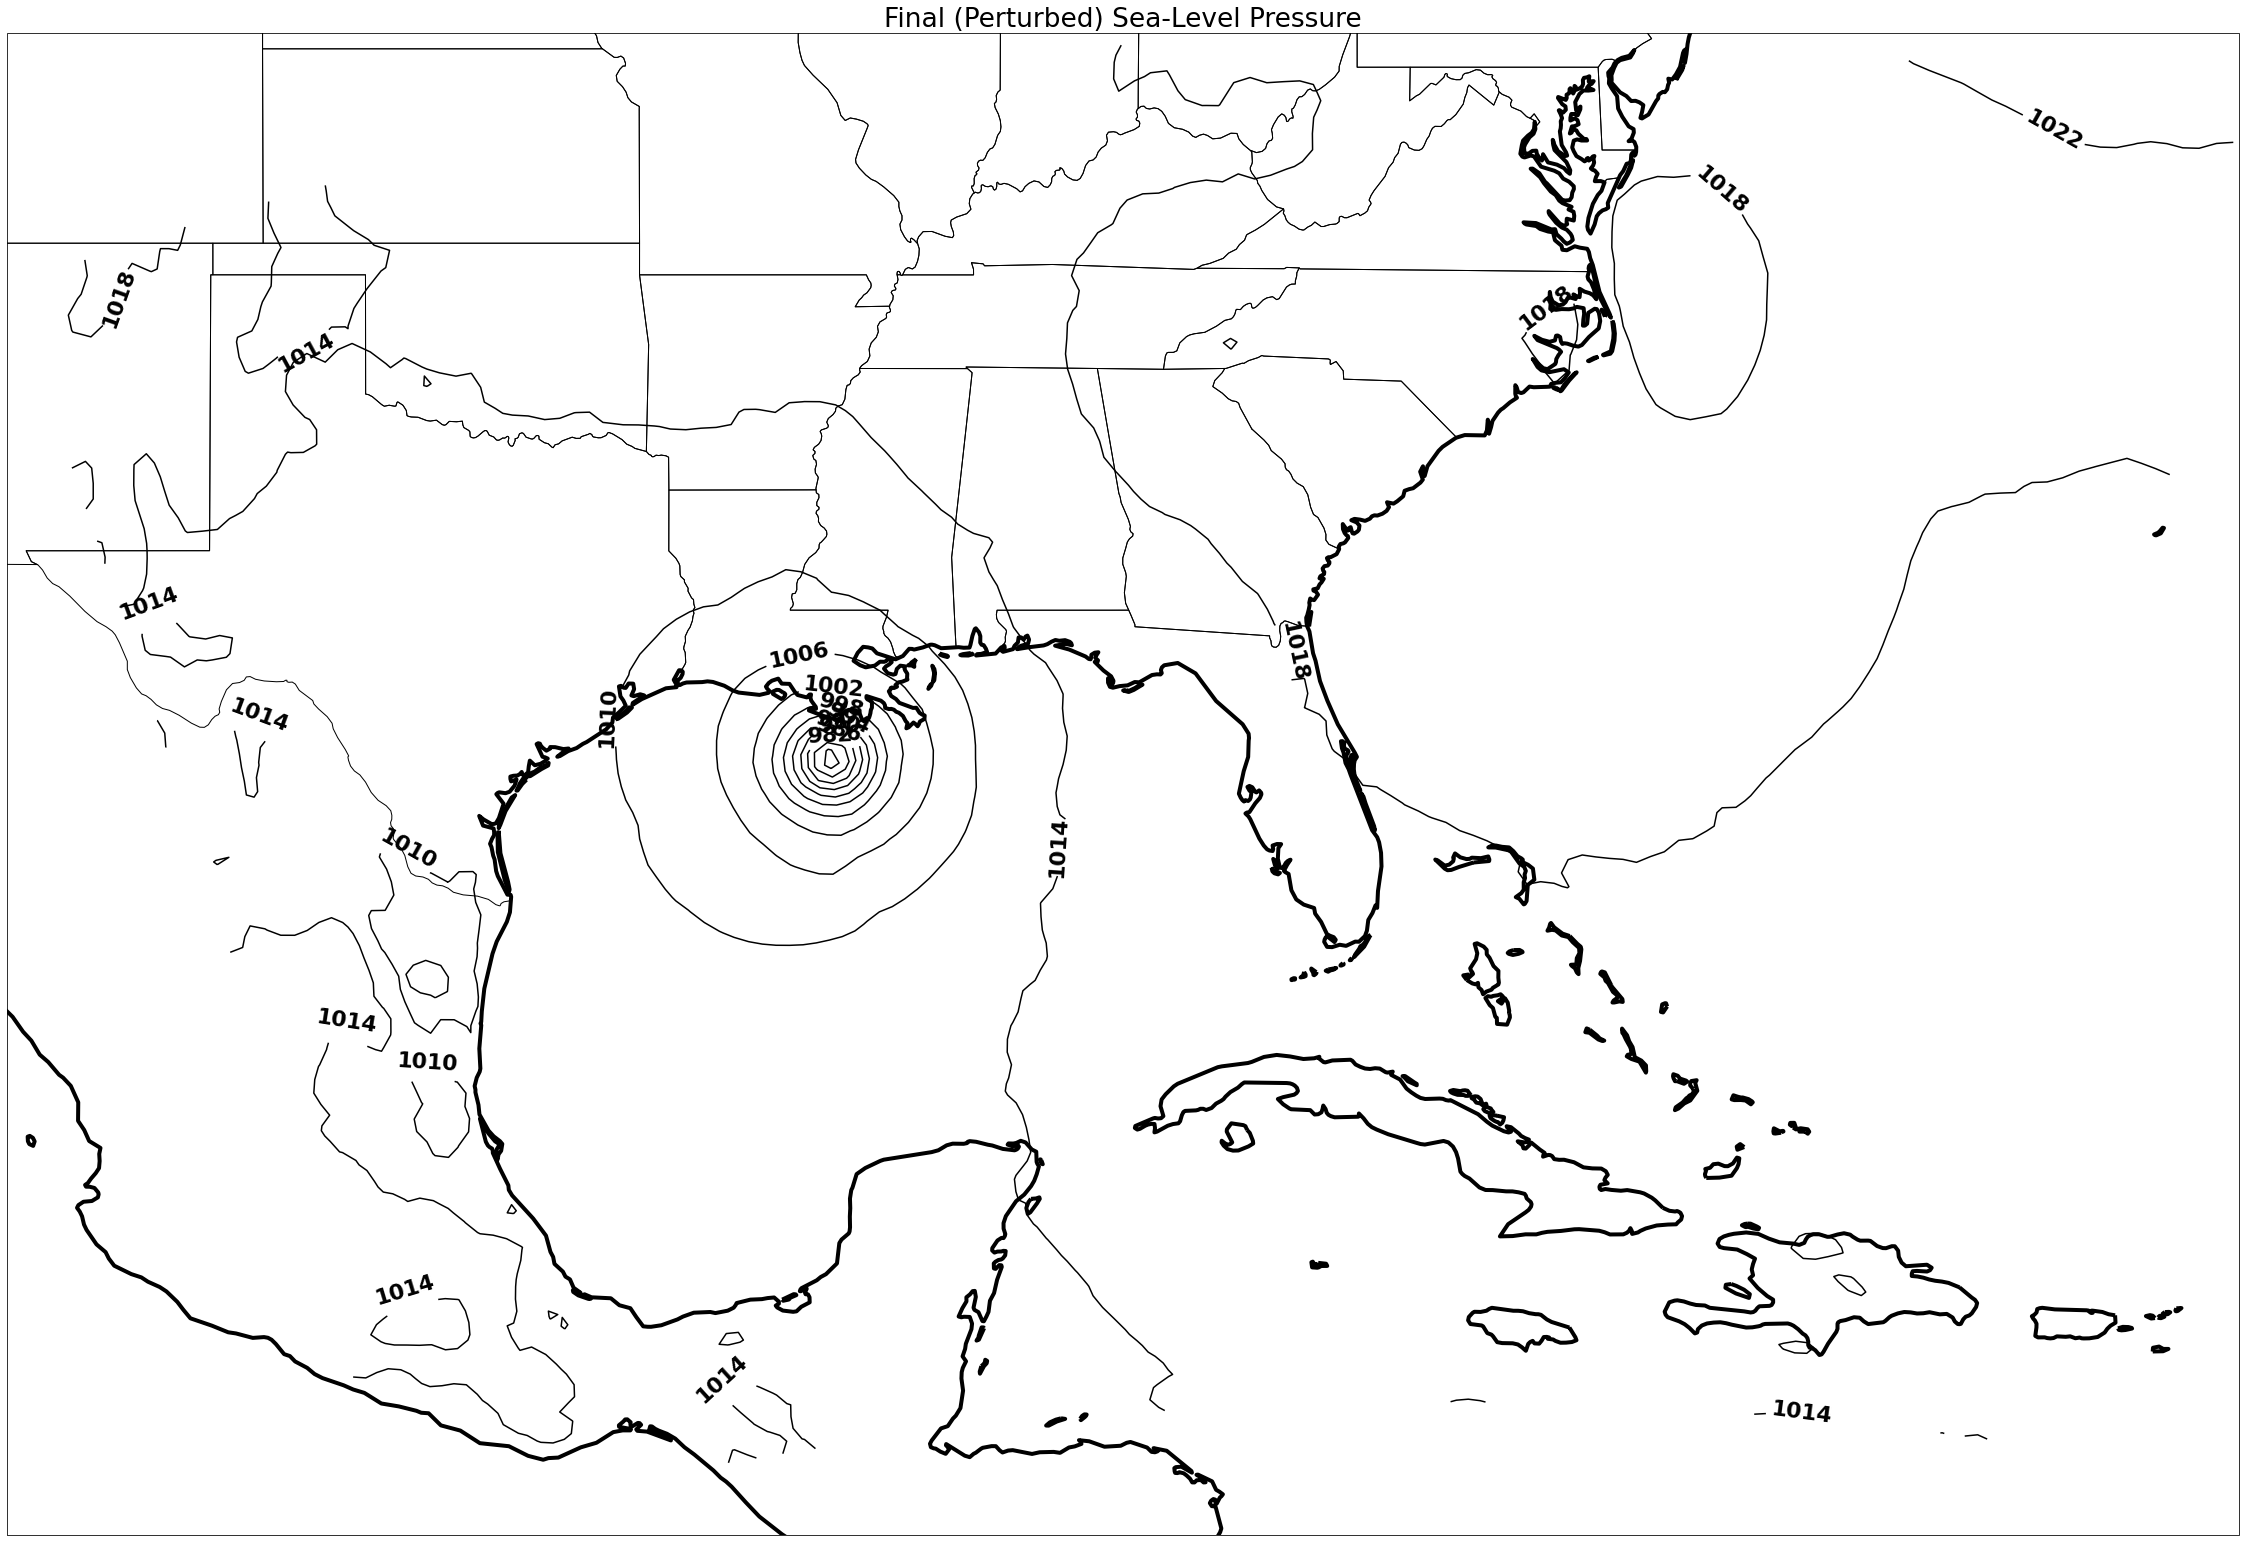

In [11]:
clevs = np.arange(950.,1040.1,4.)
vmin_pmsl = 950.
vmax_pmsl = 1040.

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add filled contours: pmsl
cs=ax.contour(
               lon,
               lat,
               pmsl_pt,
               clevs,
               zorder=1,
               transform=ccrs.PlateCarree(),
               colors='k',
               vmin=vmin_pmsl,
               vmax=vmax_pmsl,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.clabel(cs,fmt='%d')
plt.title('Final (Perturbed) Sea-Level Pressure')
plt.show()
#plt.savefig('nov2019_pmsl-F36_ptdi22.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

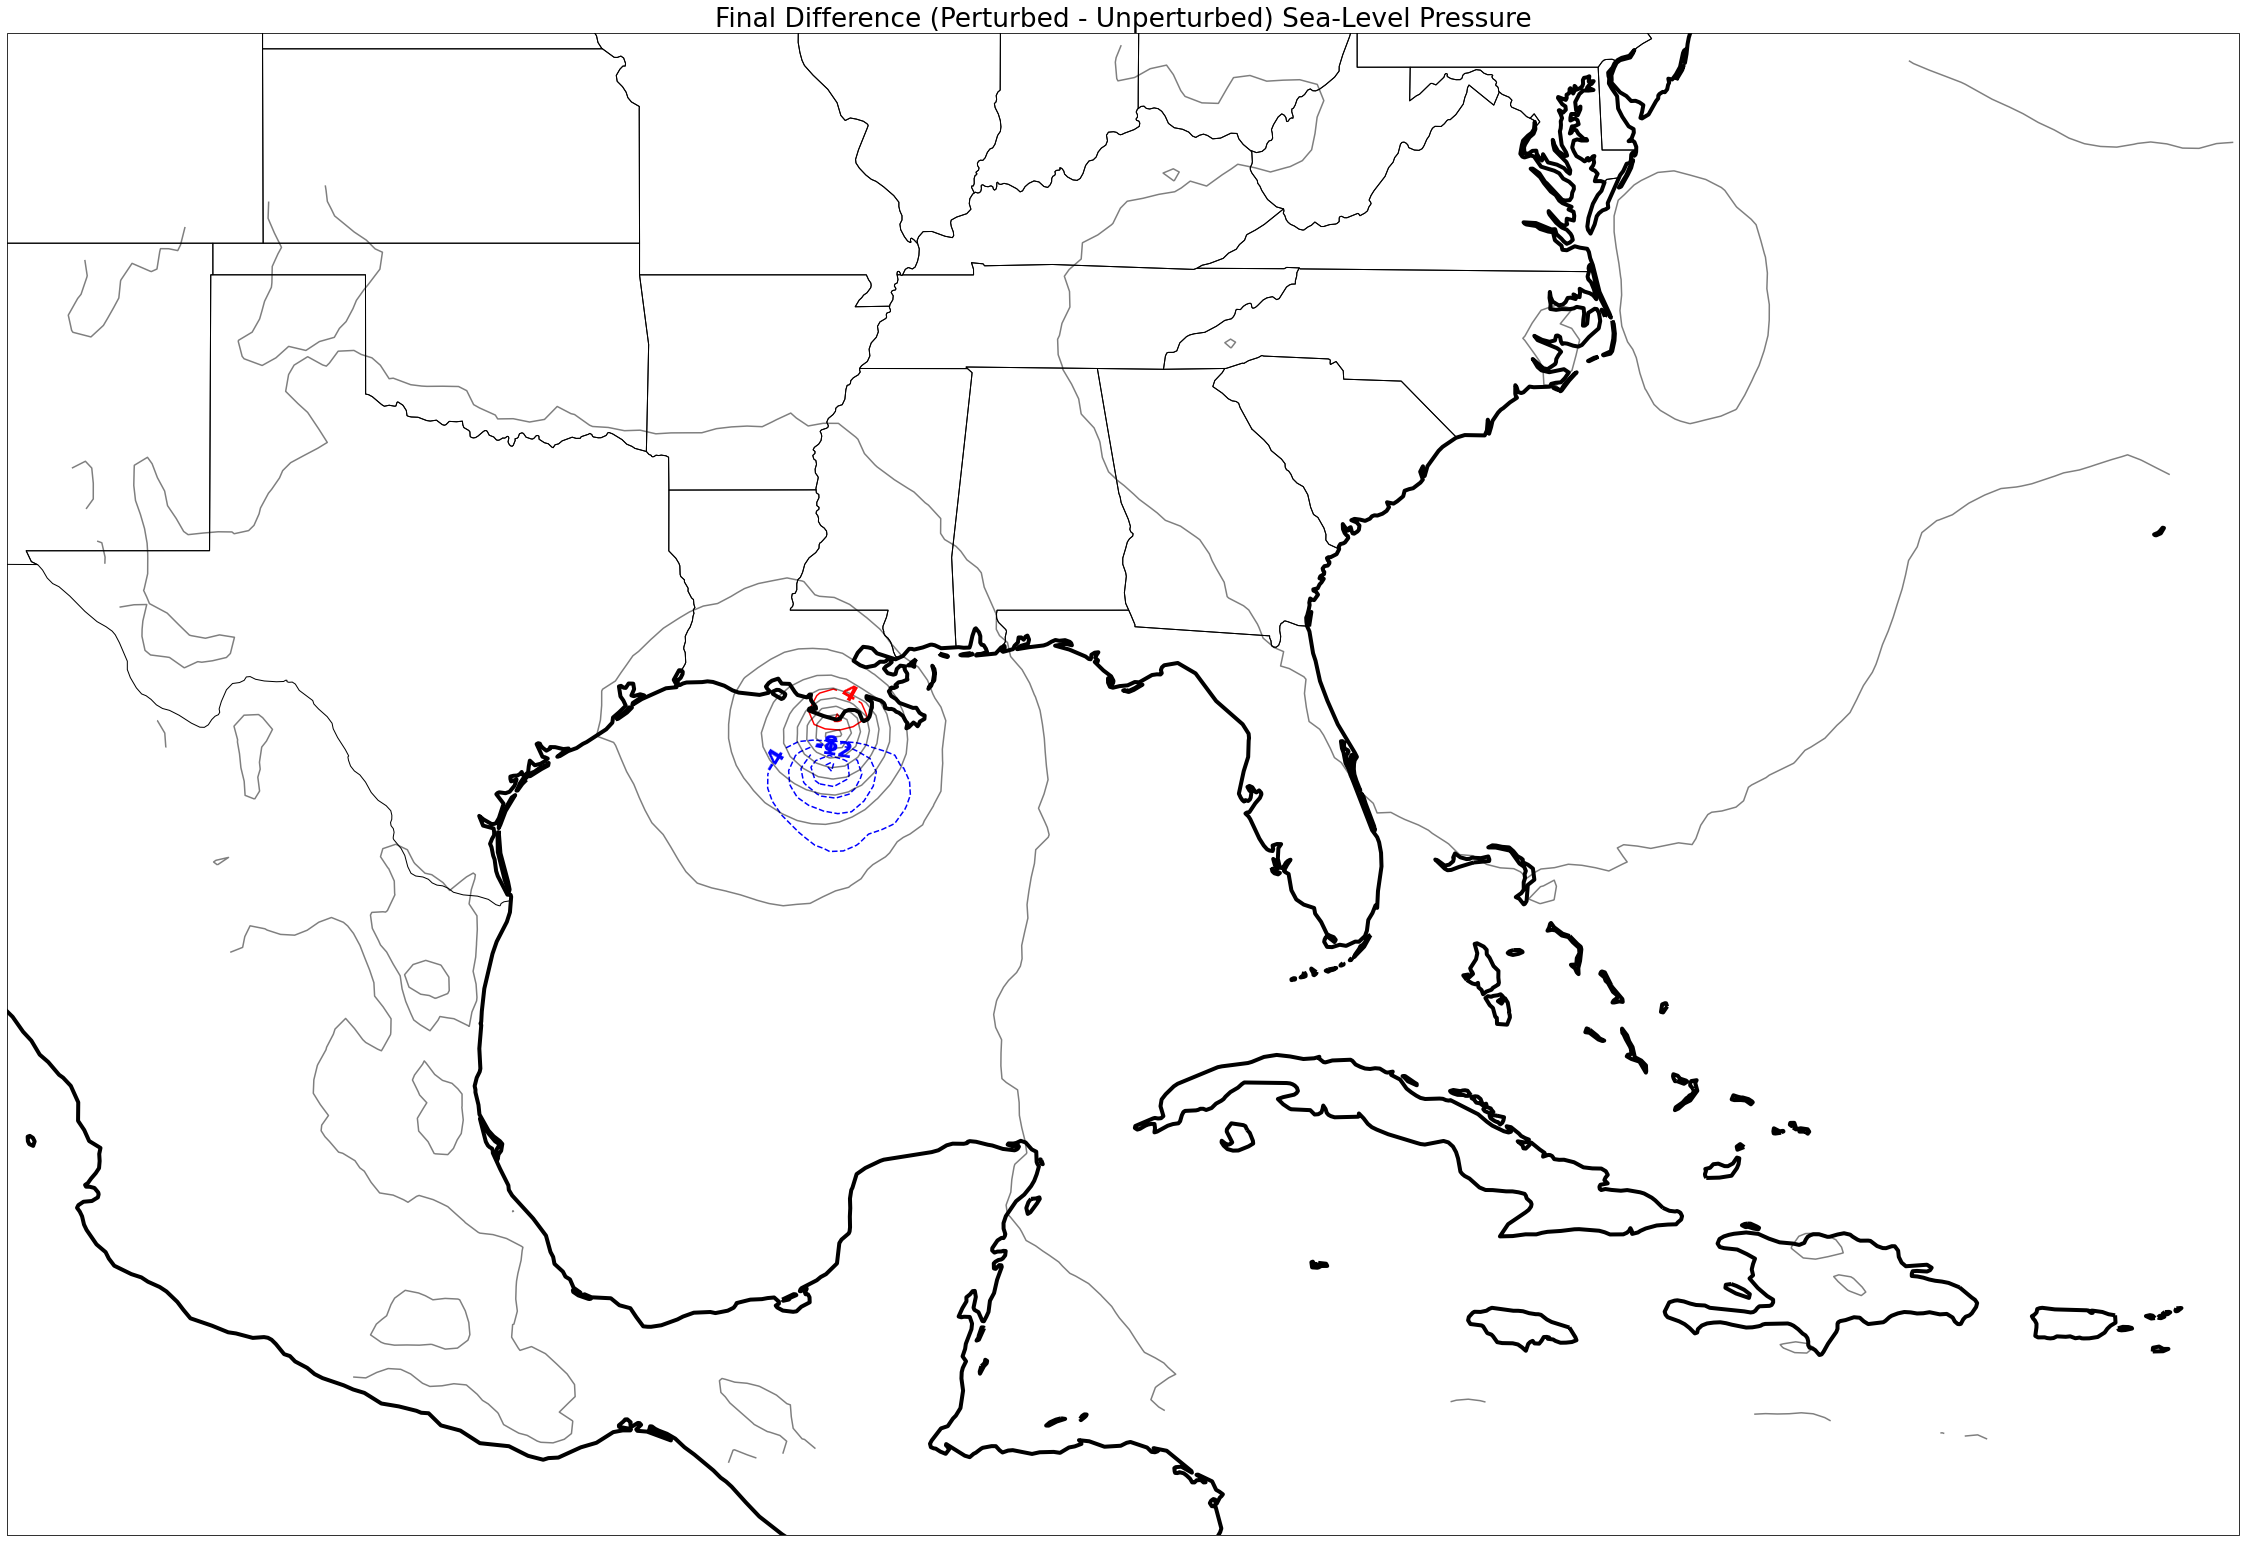

981.4383660793886 972.0160428281335


In [12]:
clevs_diff=np.arange(-40.,40.1,4.)
clevs_diff_neg=np.delete(clevs_diff,np.where(clevs_diff>=0.))
clevs_diff_pos=np.delete(clevs_diff,np.where(clevs_diff<=0.))
vmin_diff=-12.
vmax_diff=12.

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add filled contours: pmsl
csn=ax.contour(
               lon,
               lat,
               pmsl_pt-pmsl_tf,
               clevs_diff_neg,
               zorder=1,
               transform=ccrs.PlateCarree(),
               colors='b',
               vmin=vmin_diff,
               vmax=vmax_diff,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.clabel(csn,fmt='%d')
#
csp=ax.contour(
               lon,
               lat,
               pmsl_pt-pmsl_tf,
               clevs_diff_pos,
               zorder=1,
               transform=ccrs.PlateCarree(),
               colors='r',
               vmin=vmin_diff,
               vmax=vmax_diff,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.clabel(csp,fmt='%d')
#
cs=ax.contour(
               lon,
               lat,
               pmsl_tf,
               clevs,
               zorder=1,
               transform=ccrs.PlateCarree(),
               colors='k',
               vmin=vmin_pmsl,
               vmax=vmax_pmsl,
               extend=ext_opt,
               alpha=0.5,
               antialiased=True
              )

plt.title('Final Difference (Perturbed - Unperturbed) Sea-Level Pressure')
plt.show()
#plt.savefig('nov2019_pmsl-F36_diff.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)
print(np.min(pmsl_tf[j1:j2,i1:i2]),np.min(pmsl_pt[j1:j2,i1:i2]))

In [13]:
print(clevs_diff_neg)
print(clevs_diff_pos)

[-40. -36. -32. -28. -24. -20. -16. -12.  -8.  -4.]
[  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]


In [6]:
# Quantities on native (sigma) vertical coordinates
gph_t0=np.asarray(wrf.getvar(wrf_t0,'geopt')).squeeze()
gph_p0=np.asarray(wrf.getvar(wrf_p0,'geopt')).squeeze()
avo_t0=np.asarray(wrf.getvar(wrf_t0,'avo')).squeeze()
avo_p0=np.asarray(wrf.getvar(wrf_p0,'avo')).squeeze()
tk_t0=np.asarray(wrf.getvar(wrf_t0,'tk')).squeeze()
tk_p0=np.asarray(wrf.getvar(wrf_p0,'tk')).squeeze()
ua_t0=np.asarray(wrf.getvar(wrf_t0,'ua')).squeeze()
ua_p0=np.asarray(wrf.getvar(wrf_p0,'ua')).squeeze()
va_t0=np.asarray(wrf.getvar(wrf_t0,'va')).squeeze()
va_p0=np.asarray(wrf.getvar(wrf_p0,'va')).squeeze()
# Interpolated pressure levels
pres_levs=np.asarray([1000.,950.,900.,850.,800.,750.,700.,650.,600.,550.,500.,450.,400.,350.,300.,250.,200.,150.,100.,50.])
# Quantities on interpolated pressure levels
gph_t0 = wrf.vinterp(wrf_t0,field=gph_t0,vert_coord='pres',interp_levels=pres_levs)
gph_p0 = wrf.vinterp(wrf_p0,field=gph_p0,vert_coord='pres',interp_levels=pres_levs)
avo_t0 = wrf.vinterp(wrf_t0,field=avo_t0,vert_coord='pres',interp_levels=pres_levs)
avo_p0 = wrf.vinterp(wrf_p0,field=avo_p0,vert_coord='pres',interp_levels=pres_levs)
tk_t0 = wrf.vinterp(wrf_t0,field=tk_t0,vert_coord='pres',interp_levels=pres_levs)
tk_p0 = wrf.vinterp(wrf_p0,field=tk_p0,vert_coord='pres',interp_levels=pres_levs)
ua_t0 = wrf.vinterp(wrf_t0,field=ua_t0,vert_coord='pres',interp_levels=pres_levs)
ua_p0 = wrf.vinterp(wrf_p0,field=ua_p0,vert_coord='pres',interp_levels=pres_levs)
va_t0 = wrf.vinterp(wrf_t0,field=va_t0,vert_coord='pres',interp_levels=pres_levs)
va_p0 = wrf.vinterp(wrf_p0,field=va_p0,vert_coord='pres',interp_levels=pres_levs)
nz,ny,nx=np.shape(avo_t0)

In [7]:
# Define inputs to energy norm function
cp = 1004. #............................................................ heat capacity of air at constant pressure (J/kg)
t0 = 270. #............................................................. reference temperature (K)
#
W_u = 1.0 #............................................................. weighting coefficient for zonal wind in cost-function
W_v = 1.0 #............................................................. weighting coefficient for merid wind in cost-function
W_t = cp/t0 #........................................................... weighting coefficient for temperature in cost-function

up_lev=np.nan*np.ones((nz,))
tp_lev=np.nan*np.ones((nz,))
vp_lev=np.nan*np.ones((nz,))

ke_lev=np.nan*np.ones((nz,)) # kinetic energy
pe_lev=np.nan*np.ones((nz,)) # (available) potential energy

for z in range(nz):
    tk_pert = tk_p0[z,:,:].squeeze()-tk_t0[z,:,:].squeeze()
    ua_pert = ua_p0[z,:,:].squeeze()-ua_t0[z,:,:].squeeze()
    va_pert = va_p0[z,:,:].squeeze()-va_t0[z,:,:].squeeze()
    
    tp_lev[z] = np.max(np.abs(tk_pert))
    up_lev[z] = np.max(np.abs(ua_pert))
    vp_lev[z] = np.max(np.abs(va_pert))
    
    ke_lev[z] = np.sum(0.5*W_u*ua_pert**2.) + np.sum(0.5*W_v*va_pert**2.)
    pe_lev[z] = np.sum(0.5*W_t*tk_pert**2.)
    
    

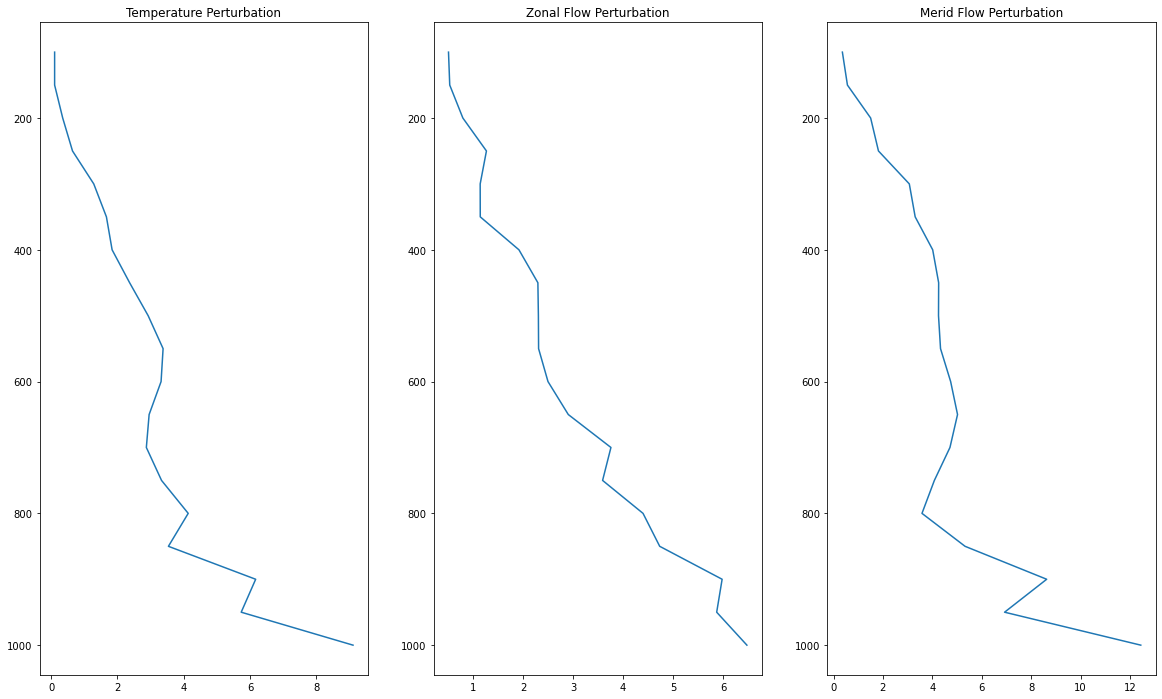

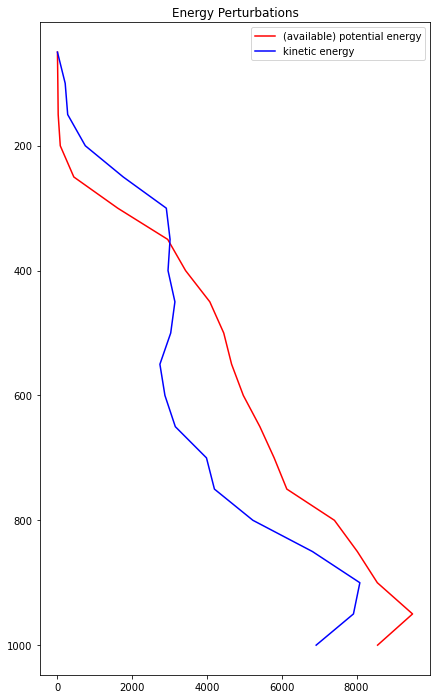

In [8]:
fig=plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.plot(tp_lev,pres_levs)
plt.gca().invert_yaxis()
plt.title('Temperature Perturbation')
plt.subplot(1,3,2)
plt.plot(up_lev,pres_levs)
plt.gca().invert_yaxis()
plt.title('Zonal Flow Perturbation')
plt.subplot(1,3,3)
plt.plot(vp_lev,pres_levs)
plt.gca().invert_yaxis()
plt.title('Merid Flow Perturbation')
plt.show()
#plt.savefig('march2020_F00-pert-profiles.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

fig=plt.figure(figsize=(7,12))
plt.plot(pe_lev,pres_levs,color='r')
plt.plot(ke_lev,pres_levs,color='b')
plt.legend(['(available) potential energy','kinetic energy'],fontsize=10)
plt.gca().invert_yaxis()
plt.title('Energy Perturbations')
plt.show()
#plt.savefig('march2020_F00-energy-profiles.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

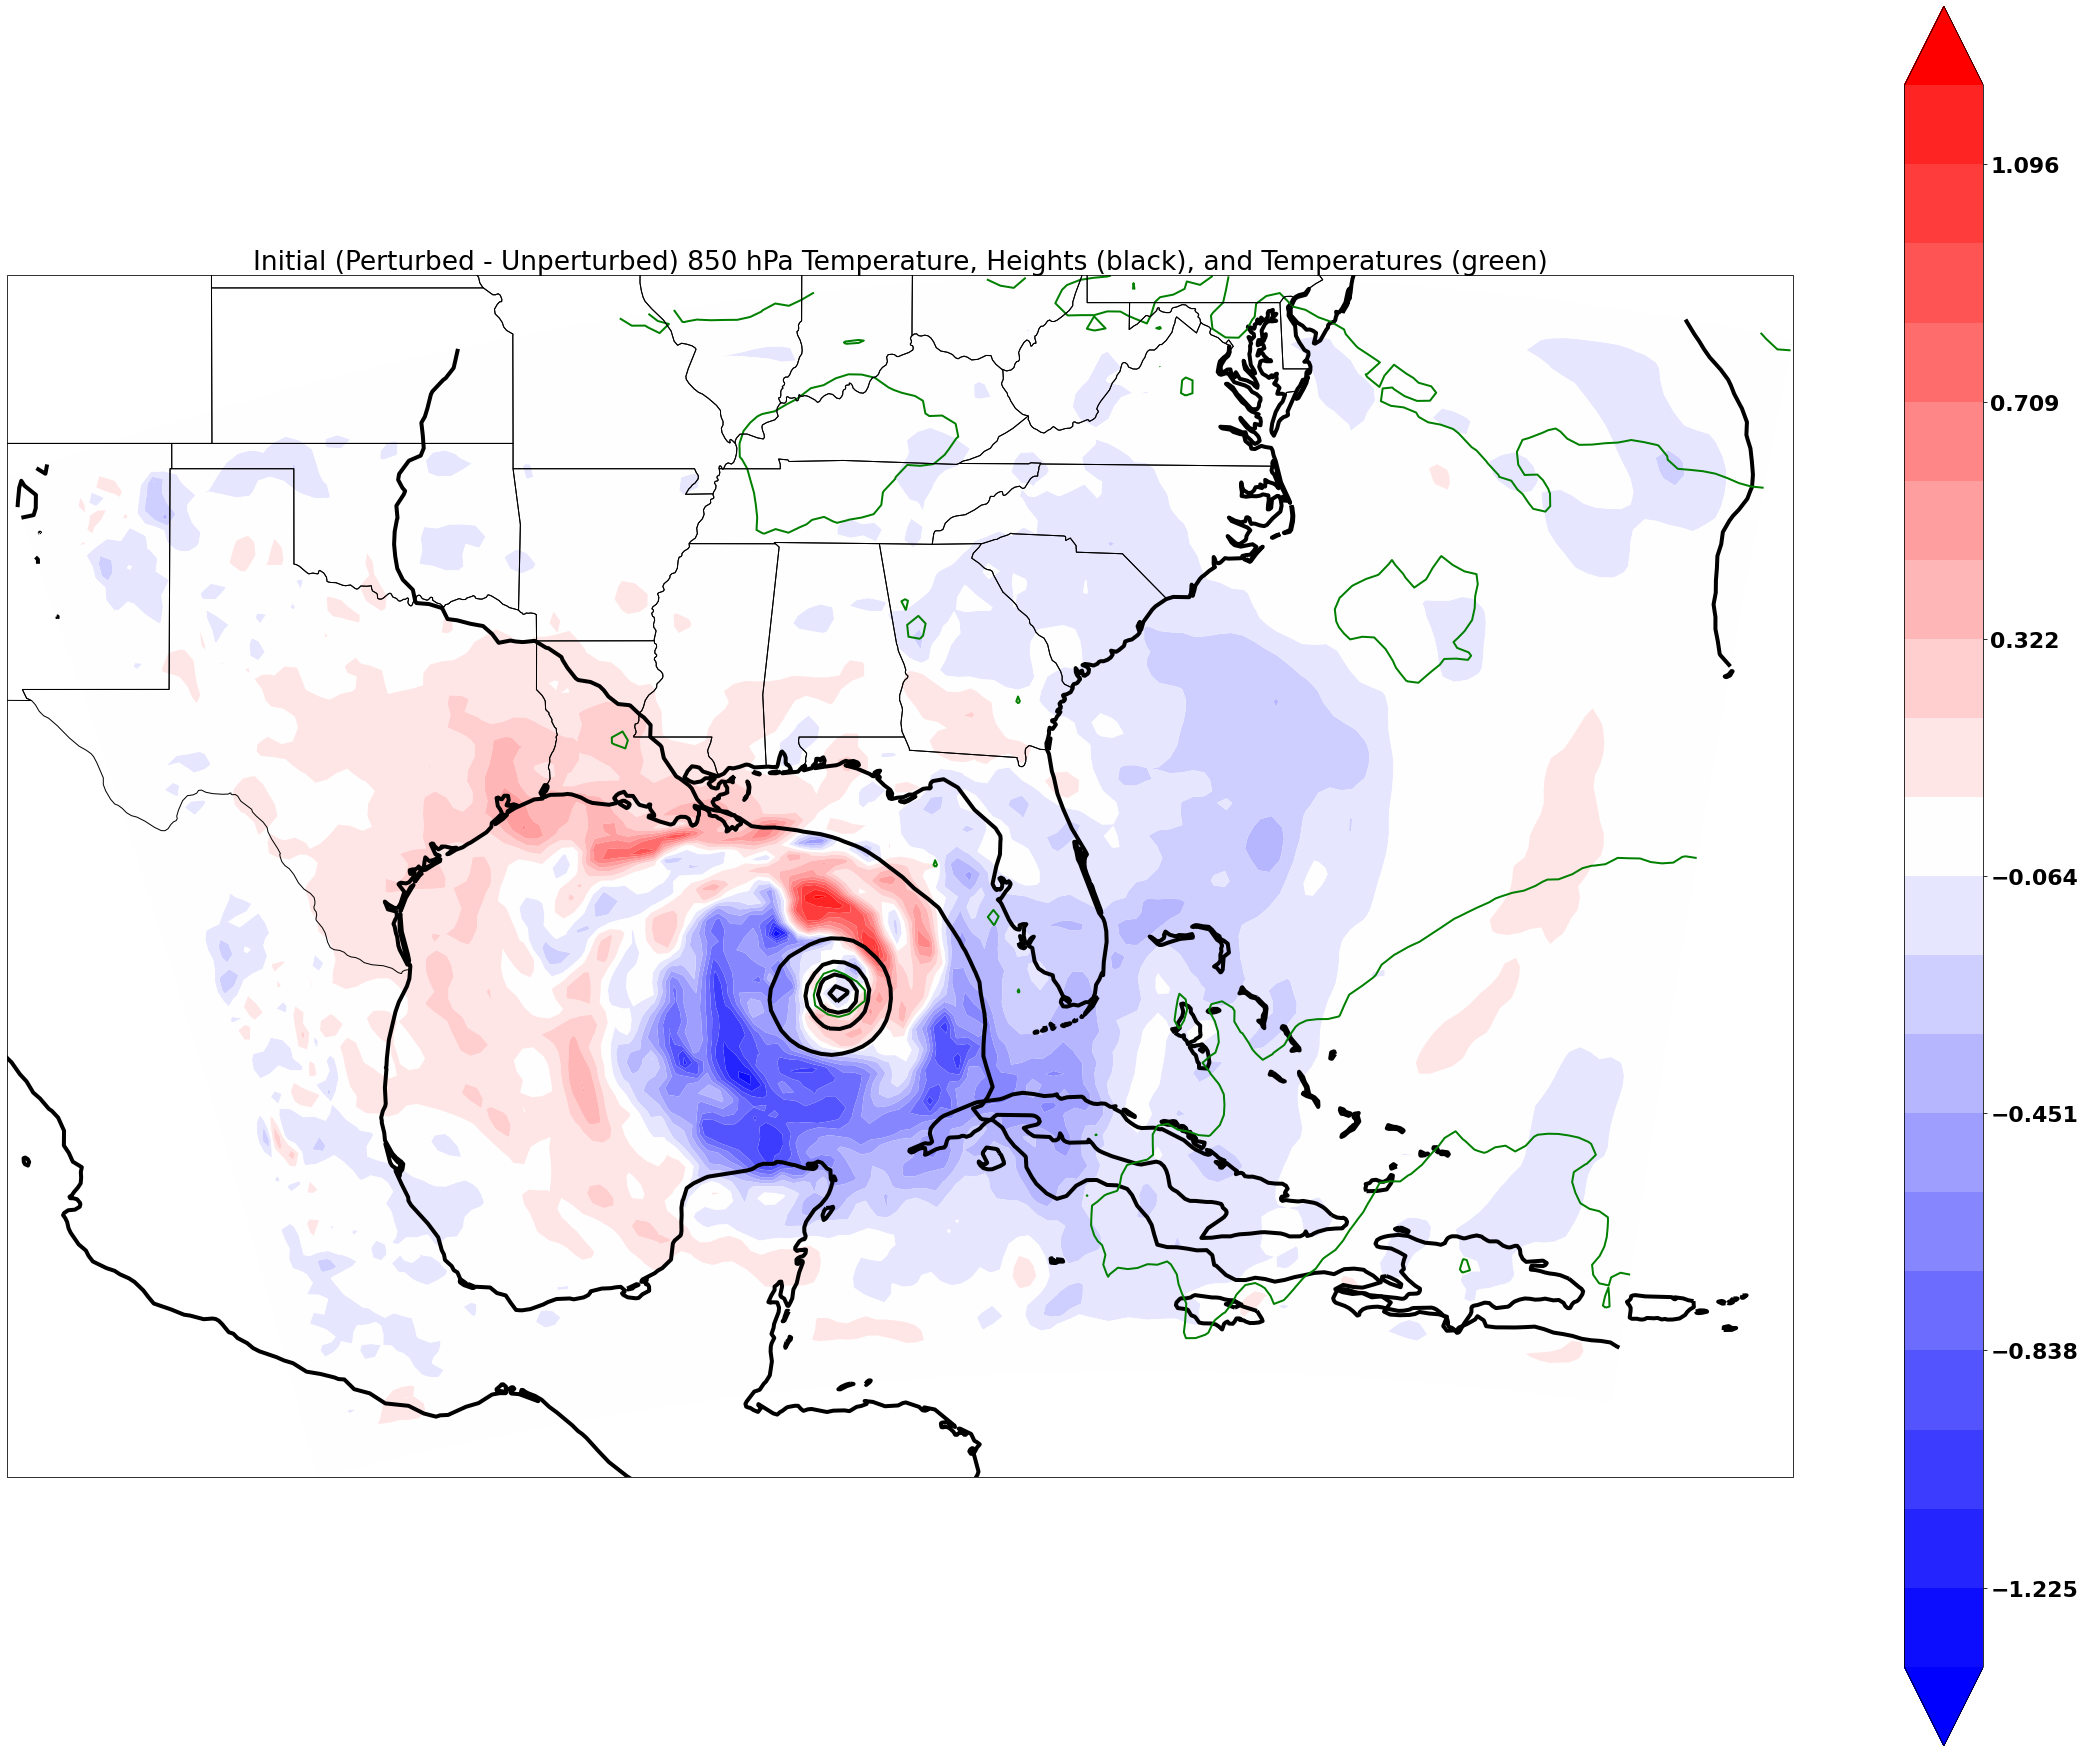

In [22]:
clevs_hght = np.arange(500.,175000.1,600.)
vmin_hght = 500.
vmax_hght = 175000.

clevs_tmpk = np.arange(190.,320.,4.)
vmin_tmpk = 190.
vmax_tmpk = 320.

pres_lev=600.
p_idx=np.where(pres_levs==pres_lev)[0]
p_fld = tk_p0[p_idx,:,:].squeeze()-tk_t0[p_idx,:,:].squeeze()
p_max = np.max(np.abs(p_fld))
clevs_diff=np.arange(-p_max,p_max,(2.*p_max)/21.)
clevs_diff_neg=np.delete(clevs_diff,np.where(clevs_diff>=0.))
clevs_diff_pos=np.delete(clevs_diff,np.where(clevs_diff<=0.))
vmin_diff=-p_max
vmax_diff=p_max

tmpk_fld=tk_t0[p_idx,:,:].squeeze()
hght_fld=gph_t0[p_idx,:,:].squeeze()

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add contours: hght (unperturbed)
pm=ax.contour(
               lon,
               lat,
               hght_fld,
               clevs_hght,
               colors='k',
               linewidths=4.,
               zorder=2,
               transform=ccrs.PlateCarree(),
               vmin=vmin_hght,
               vmax=vmax_hght,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
# Add contours: temperature (unperturbed)
tk=ax.contour(
               lon,
               lat,
               tmpk_fld,
               clevs_tmpk,
               colors='g',
               linewidths=2.,
               zorder=2,
               transform=ccrs.PlateCarree(),
               vmin=vmin_tmpk,
               vmax=vmax_tmpk,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
# Add filled contours: perturbed field
csn=ax.contourf(
               lon,
               lat,
               p_fld,
               clevs_diff,
               zorder=1,
               transform=ccrs.PlateCarree(),
               cmap='bwr',
               vmin=vmin_diff,
               vmax=vmax_diff,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.colorbar(csn)
#csp=ax.contour(
#               lon,
#               lat,
#               p_fld,
#               clevs_diff_pos,
#               zorder=2,
#               transform=ccrs.PlateCarree(),
#               colors='r',
#               vmin=vmin_diff,
#               vmax=vmax_diff,
#               extend=ext_opt,
#               alpha=1.0,
#               antialiased=True
#              )

plt.title('Initial (Perturbed - Unperturbed) 850 hPa Temperature, Heights (black), and Temperatures (green)')
plt.show()
#plt.savefig('march2020_850TMPK-F00_diff.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

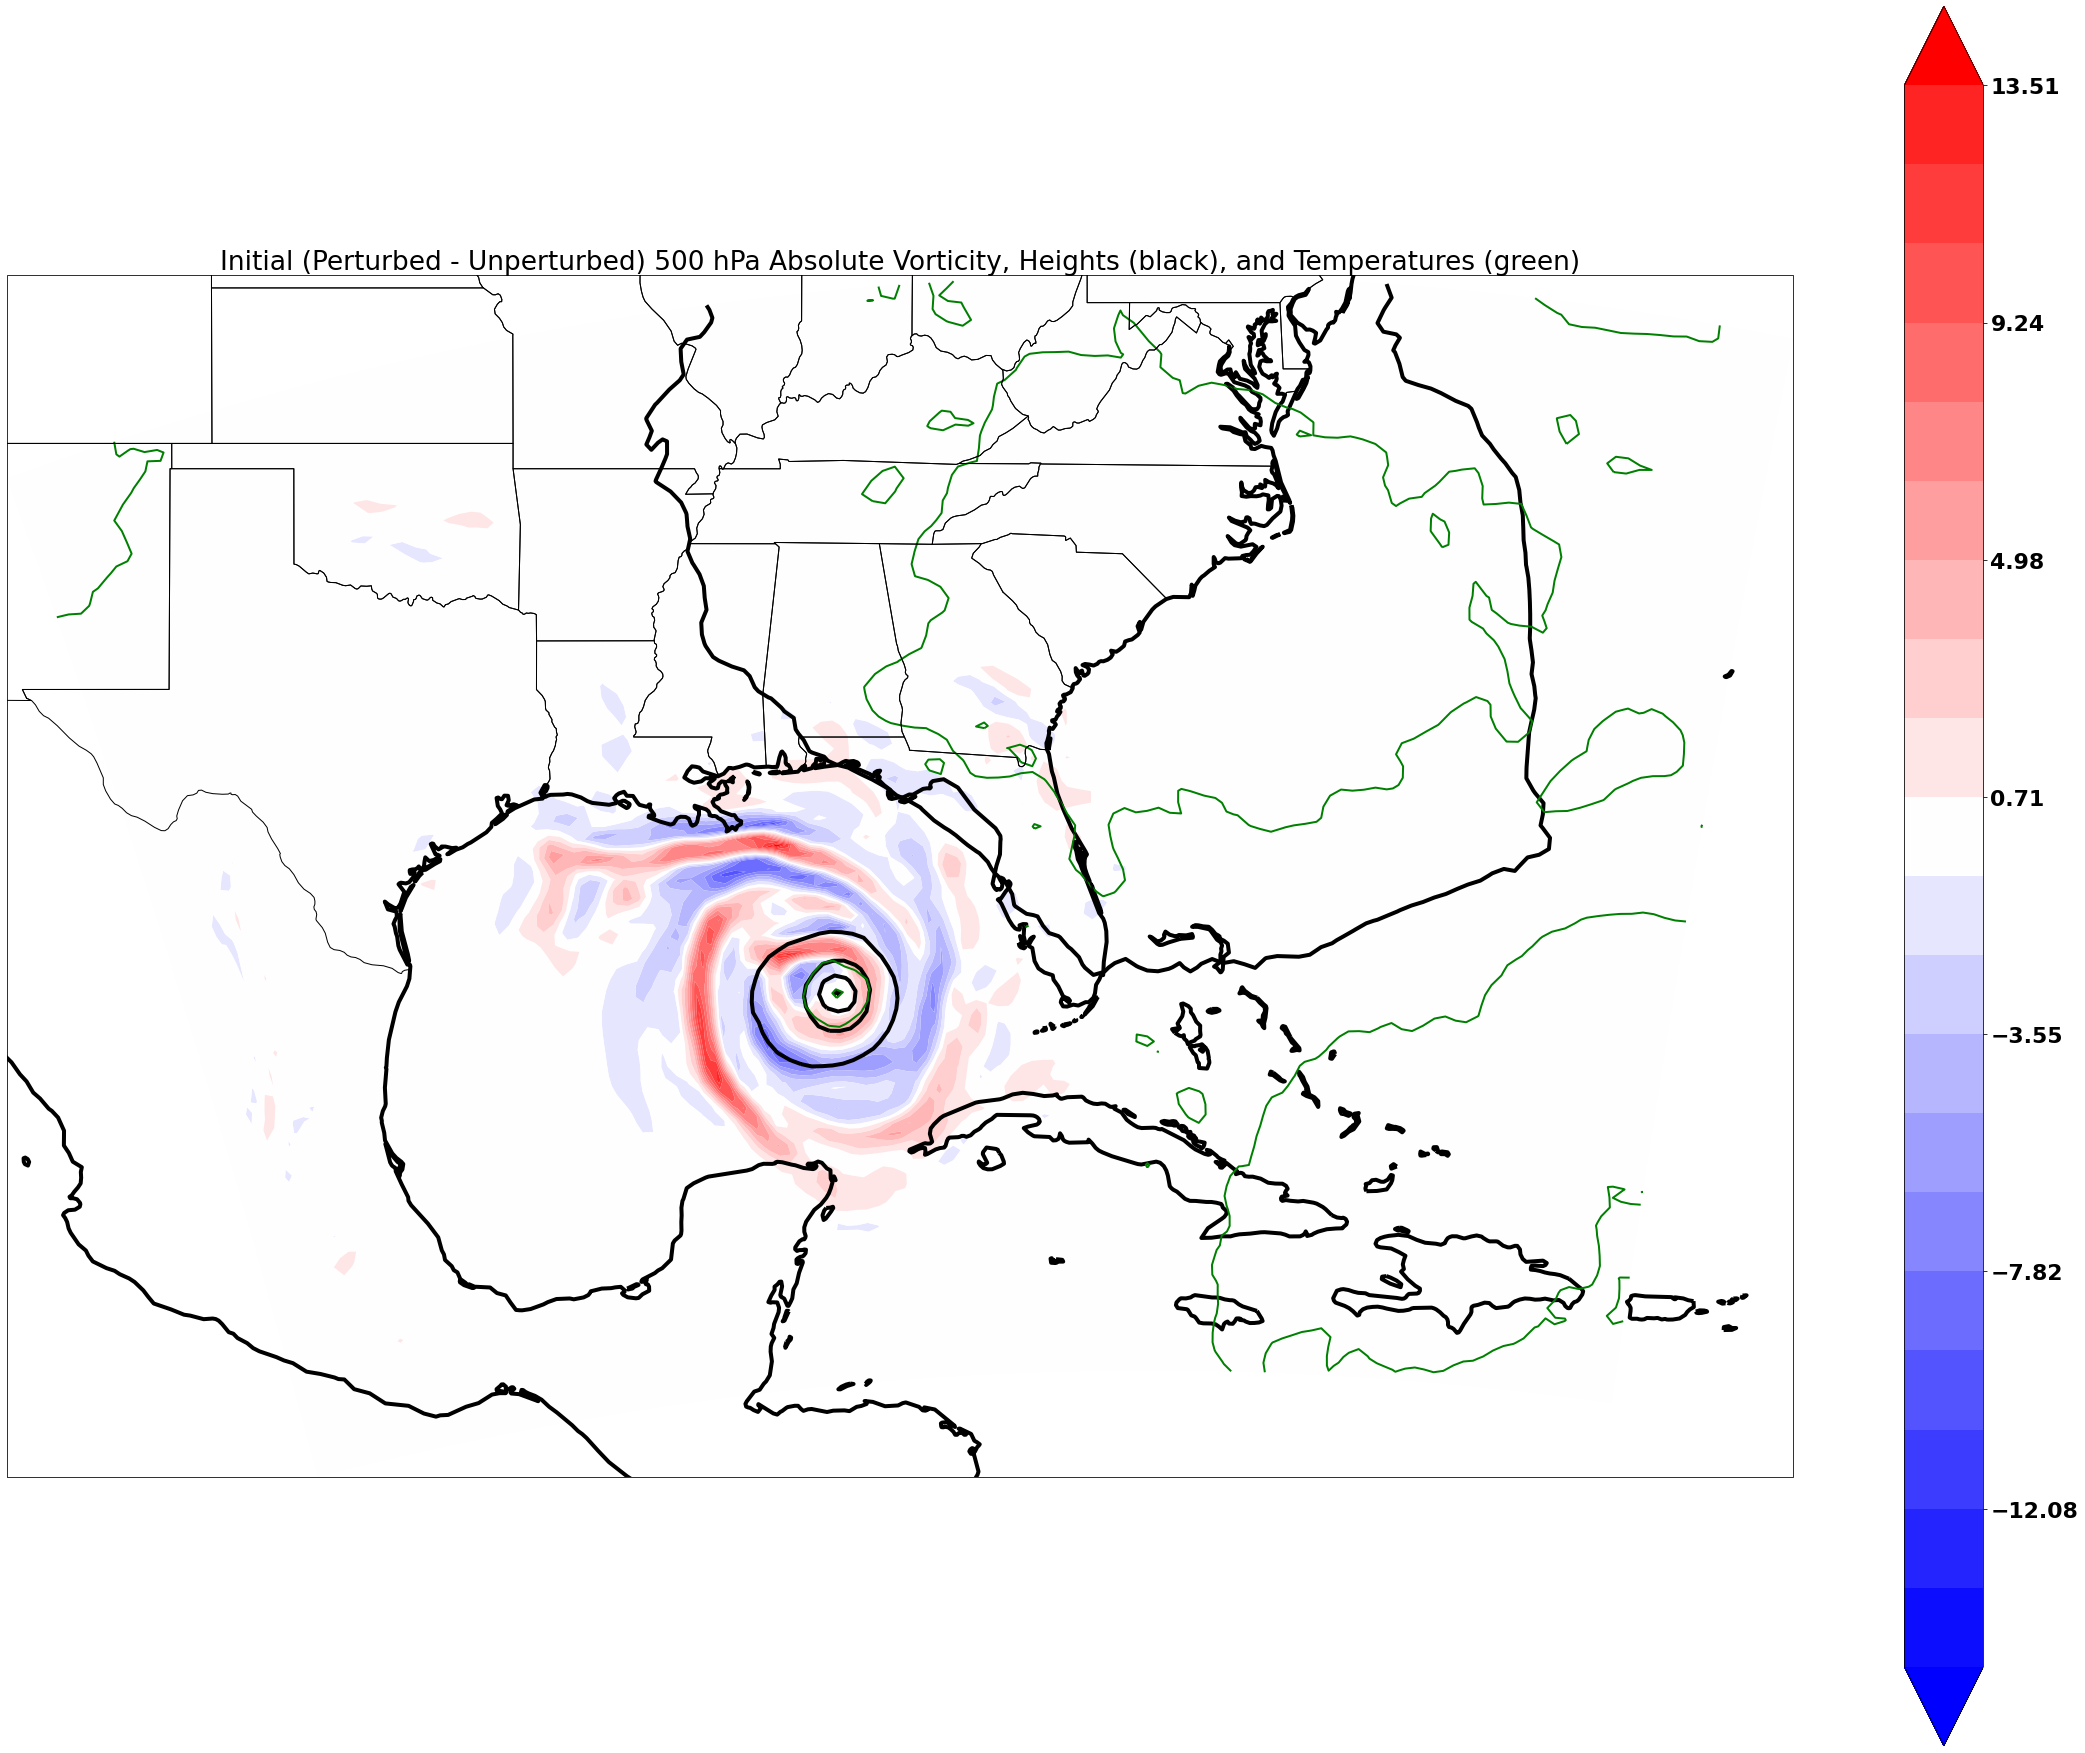

In [23]:
clevs_hght = np.arange(500.,175000.1,600.)
vmin_hght = 500.
vmax_hght = 175000.

clevs_tmpk = np.arange(190.,320.,4.)
vmin_tmpk = 190.
vmax_tmpk = 320.

pres_lev=500.
p_idx=np.where(pres_levs==pres_lev)[0]
p_fld = avo_p0[p_idx,:,:].squeeze()-avo_t0[p_idx,:,:].squeeze()
p_max = np.max(np.abs(p_fld))
clevs_diff=np.arange(-p_max,p_max,(2.*p_max)/21.)
clevs_diff_neg=np.delete(clevs_diff,np.where(clevs_diff>=0.))
clevs_diff_pos=np.delete(clevs_diff,np.where(clevs_diff<=0.))
vmin_diff=-p_max
vmax_diff=p_max

tmpk_fld=tk_t0[p_idx,:,:].squeeze()
hght_fld=gph_t0[p_idx,:,:].squeeze()

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add contours: hght (unperturbed)
pm=ax.contour(
               lon,
               lat,
               hght_fld,
               clevs_hght,
               colors='k',
               linewidths=4.,
               zorder=2,
               transform=ccrs.PlateCarree(),
               vmin=vmin_hght,
               vmax=vmax_hght,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
# Add contours: temperature (unperturbed)
tk=ax.contour(
               lon,
               lat,
               tmpk_fld,
               clevs_tmpk,
               colors='g',
               linewidths=2.,
               zorder=2,
               transform=ccrs.PlateCarree(),
               vmin=vmin_tmpk,
               vmax=vmax_tmpk,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
# Add filled contours: perturbed field
csn=ax.contourf(
               lon,
               lat,
               p_fld,
               clevs_diff,
               zorder=1,
               transform=ccrs.PlateCarree(),
               cmap='bwr',
               vmin=vmin_diff,
               vmax=vmax_diff,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.colorbar(csn)
#csp=ax.contour(
#               lon,
#               lat,
#               p_fld,
#               clevs_diff_pos,
#               zorder=2,
#               transform=ccrs.PlateCarree(),
#               colors='r',
#               vmin=vmin_diff,
#               vmax=vmax_diff,
#               extend=ext_opt,
#               alpha=1.0,
#               antialiased=True
#              )

plt.title('Initial (Perturbed - Unperturbed) 500 hPa Absolute Vorticity, Heights (black), and Temperatures (green)')
plt.show()
#plt.savefig('march2020_500AVOR-F00_diff.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

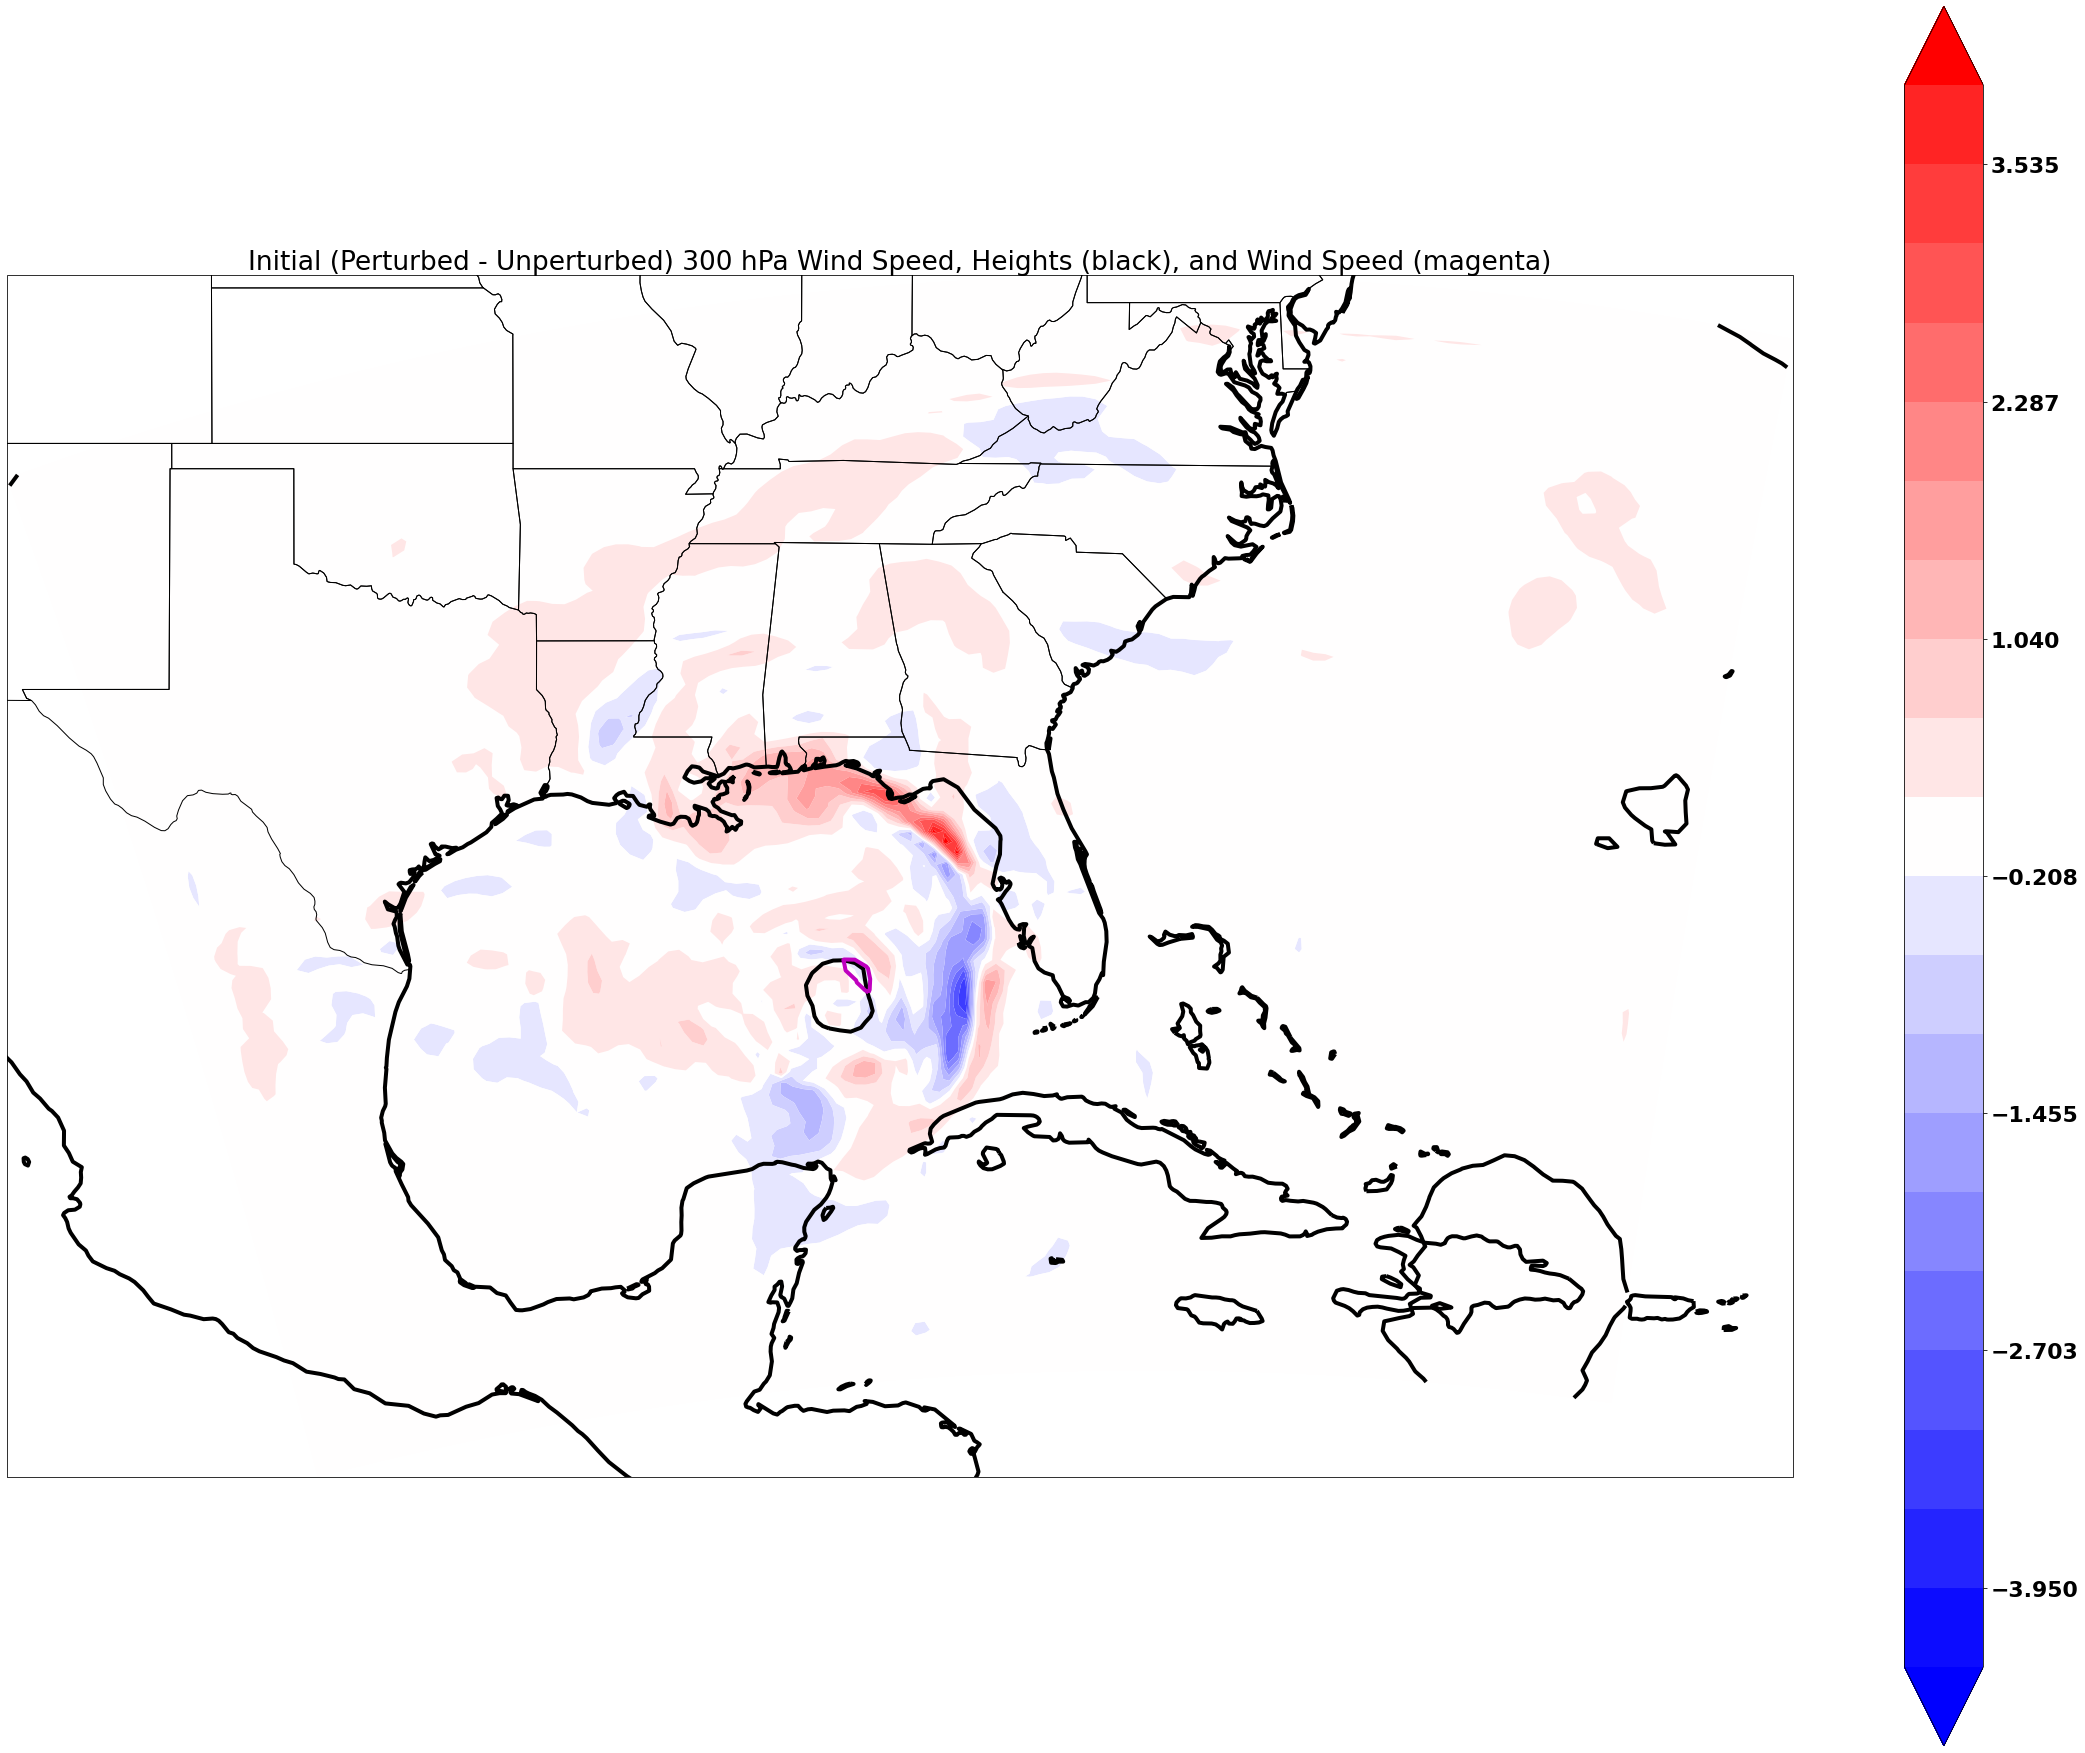

In [24]:
clevs_hght = np.arange(500.,175000.1,900.)
vmin_hght = 500.
vmax_hght = 175000.

clevs_wspd = np.arange(30.,90.,12.)
vmin_wspd = 15.
vmax_wspd = 90.

pres_lev=300.
p_idx=np.where(pres_levs==pres_lev)[0]
p_fld = np.sqrt(ua_p0[p_idx,:,:].squeeze()**2.+va_p0[p_idx,:,:].squeeze()**2.)-np.sqrt(ua_t0[p_idx,:,:].squeeze()**2.+va_t0[p_idx,:,:].squeeze()**2.)
p_max = np.max(np.abs(p_fld))
clevs_diff=np.arange(-p_max,p_max,(2.*p_max)/21.)
clevs_diff_neg=np.delete(clevs_diff,np.where(clevs_diff>=0.))
clevs_diff_pos=np.delete(clevs_diff,np.where(clevs_diff<=0.))
vmin_diff=-p_max
vmax_diff=p_max

wspd_fld=np.sqrt(ua_t0[p_idx,:,:].squeeze()**2.+va_t0[p_idx,:,:].squeeze()**2.)
hght_fld=gph_t0[p_idx,:,:].squeeze()

fig=plt.figure( #.......................................................................... Figure handle with figure size
               figsize=(40,32)
              )
ax=plt.axes( #............................................................................. Figure axis with projection (central lat/lon from HRRR-AK grid)
            projection=proj
           )
# Add borders
ax.add_feature(
               border_feature, 
               zorder=100, 
               facecolor='none', 
               edgecolor='k'
              )
# Add coastlines
ax.coastlines(resolution='50m',linewidth=4)
# Add contours: hght (unperturbed)
pm=ax.contour(
               lon,
               lat,
               hght_fld,
               clevs_hght,
               colors='k',
               linewidths=4.,
               zorder=2,
               transform=ccrs.PlateCarree(),
               vmin=vmin_hght,
               vmax=vmax_hght,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
# Add contours: wind speed (unperturbed)
tk=ax.contour(
               lon,
               lat,
               wspd_fld,
               clevs_wspd,
               colors='m',
               linewidths=4.,
               zorder=2,
               transform=ccrs.PlateCarree(),
               vmin=vmin_wspd,
               vmax=vmax_wspd,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
# Add filled contours: perturbed field
csn=ax.contourf(
               lon,
               lat,
               p_fld,
               clevs_diff,
               zorder=1,
               transform=ccrs.PlateCarree(),
               cmap='bwr',
               vmin=vmin_diff,
               vmax=vmax_diff,
               extend=ext_opt,
               alpha=1.0,
               antialiased=True
              )
plt.colorbar(csn)
#csp=ax.contour(
#               lon,
#               lat,
#               p_fld,
#               clevs_diff_pos,
#               zorder=2,
#               transform=ccrs.PlateCarree(),
#               colors='r',
#               vmin=vmin_diff,
#               vmax=vmax_diff,
#               extend=ext_opt,
#               alpha=1.0,
#               antialiased=True
#              )

plt.title('Initial (Perturbed - Unperturbed) 300 hPa Wind Speed, Heights (black), and Wind Speed (magenta)')
plt.show()
#plt.savefig('march2020_300WSPD-F00_diff.jpg',format='jpg',bbox_inches='tight')
#plt.close(fig)

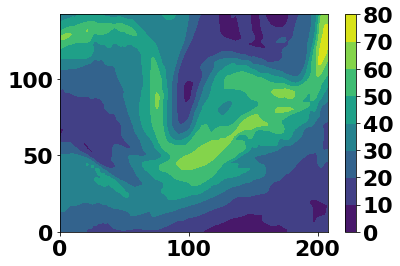

In [20]:
plt.contourf(wspd_fld)
plt.colorbar()
plt.show()

In [20]:
tpw_file='GPS-MET_GFS-F9_2019071800.nc'
ini_date=tpw_file[-13:-3]

In [22]:
import datetime as dtime

dtime.datetime.strptime(ini_date,'%Y%m%d%H')

datetime.datetime(2019, 7, 18, 0, 0)

In [25]:
x=Dataset('/Volumes/R10N_STORE/SSEC_SAVE/TAMDAR/TPW/nuo/ctl_tamdar/GPS-MET_GFS-F9_2019071300.nc')
tpw_ob_1 = np.asarray(x.variables['GPS_MET_TPW_1']).squeeze()
tpw_ob_2 = np.asarray(x.variables['GPS_MET_TPW_2']).squeeze()
tpw_fcst = np.asarray(x.variables['GFS_FCS_TPW']).squeeze()
tpw_lats = np.asarray(x.variables['GPS_MET_LAT']).squeeze()
tpw_lons = np.asarray(x.variables['GPS_MET_LON']).squeeze()

tpw_ob = 0.5*(tpw_ob_1 + tpw_ob_2)

In [31]:
idx_remove=np.where(np.isnan(tpw_ob))
tpw_ob = np.delete(tpw_ob,idx_remove,axis=0)
tpw_fcst = np.delete(tpw_fcst,idx_remove,axis=0)
tpw_lats = np.delete(tpw_lats,idx_remove,axis=0)
tpw_lons = np.delete(tpw_lons,idx_remove,axis=0)


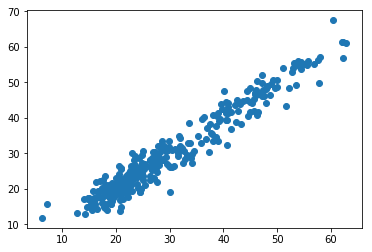

In [34]:
plt.plot(tpw_ob,tpw_fcst,'o')
plt.show()

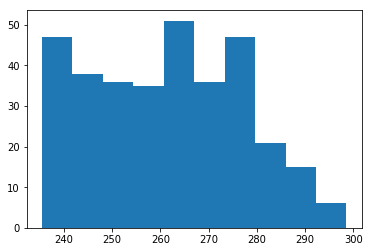

In [35]:
plt.hist(tpw_lons)
plt.show()

In [33]:
import datetime as dt
st = dt.datetime.strptime('2020010100','%Y%m%d%H')
et = st + dt.timedelta(hours=24)

dt.datetime.strftime(st,'%Y-%m-%d_%H:%M:%S')

'2020-01-01_00:00:00'

In [10]:
int('0')

0

In [22]:
x=np.arange(10)
print(np.arange(0,10,1))
print(np.arange(1,10+1,1))
xmin=2
xmax=10
print(x[xmin-1:xmax])

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3 4 5 6 7 8 9]


In [27]:
inp_file='tmp.txt'
inp_hdl=open(inp_file,'r')
inp_list=[line.rstrip('\n') for line in inp_hdl]
for mem in inp_list:
    print(mem)

input 1
input 2
input 3
input 4
input 5


In [6]:
x='hello'+' world'
print(x)

hello world
